# CV0003 Mini Project: Happiness World Report
### Which variable contributes the most to the Happiness Score across all countries?
Source: http://worldhappiness.report/ed/2018/

Project by: Leo Kew Xun Wei, Tham Ren Hao Terence, Chang Chia Chyi, Lim Jie Kang Brendan, Lee Si Min

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Cleaning the Dataset

In [2]:
#Reading the excel file consisting the data
data = pd.read_excel('WHR2018Chapter2OnlineData.xls', header = None)
data.head()

0     1            2                   3               4   \
0      country  year  Life Ladder  Log GDP per capita  Social support   
1  Afghanistan  2008      3.72359             7.16869        0.450662   
2  Afghanistan  2009      4.40178             7.33379        0.552308   
3  Afghanistan  2010      4.75838             7.38663        0.539075   
4  Afghanistan  2011      3.83172             7.41502        0.521104   

                                 5                             6           7   \
0  Healthy life expectancy at birth  Freedom to make life choices  Generosity   
1                           49.2097                      0.718114    0.181819   
2                           49.6244                      0.678896    0.203614   
3                            50.009                      0.600127     0.13763   
4                           50.3673                      0.495901    0.175329   

                          8                9                10  \
0  Perceptions of corruption  Positive affect  Negative affect   
1                   0.881686         0.517637         0.258195   
2                   0.850035         0.583926         0.237092   
3                   0.706766         0.618265         0.275324   
4                   0.731109         0.611387         0.267175   

                                  11                  12                13  \
0  Confidence in national government  Democratic Quality  Delivery Quality   
1                           0.612072            -1.92969          -1.65508   
2                           0.611545            -2.04409          -1.63502   
3                           0.299357            -1.99181          -1.61718   
4                           0.307386            -1.91902          -1.61622   

                                             14  \
0  Standard deviation of ladder by country-year   
1                                       1.77466   
2                                       1.72269   
3                                       1.87862   
4                                       1.78536   

                                                  15  \
0  Standard deviation/Mean of ladder by country-year   
1                                             0.4766   
2                                           0.391362   
3                                           0.394803   
4                                           0.465942   

                                 16  \
0  GINI index (World Bank estimate)   
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   

                                                  17  \
0  GINI index (World Bank estimate), average 2000-15   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                  18  
0  gini of household income reported in Gallup, b...  
1                                                NaN  
2                                           0.441906  
3                                           0.327318  
4                                           0.336764

In [3]:
#Drop the first row of numbers
data.columns = data.iloc[0]
data.drop(0)

0         country  year Life Ladder Log GDP per capita Social support  \
1     Afghanistan  2008     3.72359            7.16869       0.450662   
2     Afghanistan  2009     4.40178            7.33379       0.552308   
3     Afghanistan  2010     4.75838            7.38663       0.539075   
4     Afghanistan  2011     3.83172            7.41502       0.521104   
5     Afghanistan  2012     3.78294            7.51713       0.520637   
6     Afghanistan  2013      3.5721            7.50338       0.483552   
7     Afghanistan  2014      3.1309            7.48458       0.525568   
8     Afghanistan  2015     3.98285            7.46622       0.528597   
9     Afghanistan  2016     4.22017             7.4614       0.559072   
10    Afghanistan  2017     2.66172            7.46014        0.49088   
11        Albania  2007     4.63425            9.07732       0.821372   
12        Albania  2009     5.48547            9.16163       0.833047   
13        Albania  2010     5.26894            9.20303       0.733152   
14        Albania  2011     5.86742             9.2309       0.759434   
15        Albania  2012     5.51012            9.24665       0.784502   
16        Albania  2013     4.55065            9.25844       0.759477   
17        Albania  2014     4.81376             9.2781       0.625587   
18        Albania  2015     4.60665            9.30303       0.639356   
19        Albania  2016      4.5111            9.33777       0.638411   
20        Albania  2017     4.63955            9.37372       0.637698   
21        Algeria  2010     5.46357             9.4627            NaN   
22        Algeria  2011     5.31719            9.47196       0.810234   
23        Algeria  2012      5.6046            9.48509       0.839397   
24        Algeria  2014      6.3549            9.50921       0.818189   
25        Algeria  2016     5.34085            9.54117       0.748588   
26        Algeria  2017     5.24891            9.54024       0.806754   
27         Angola  2011       5.589            8.68461       0.723094   
28         Angola  2012     4.36025            8.69929       0.752593   
29         Angola  2013     3.93711            8.72988       0.721591   
30         Angola  2014     3.79484            8.74196       0.754615   
...           ...   ...         ...                ...            ...   
1533        Yemen  2011     3.74626            8.24413        0.66268   
1534        Yemen  2012      4.0606            8.24102       0.681678   
1535        Yemen  2013     4.21768            8.26173       0.693905   
1536        Yemen  2014     3.96796            8.23398       0.638252   
1537        Yemen  2015     2.98267            7.87893       0.668683   
1538        Yemen  2016     3.82563            7.75151       0.775407   
1539        Yemen  2017     3.25356                NaN       0.789555   
1540       Zambia  2006     4.82445            7.86601       0.797665   
1541       Zambia  2007     3.99829            7.91894       0.687989   
1542       Zambia  2008     4.73026            7.96617       0.624418   
1543       Zambia  2009     5.26036            8.02619       0.781926   
1544       Zambia  2011     4.99911            8.12003       0.864023   
1545       Zambia  2012     5.01337             8.1632       0.780023   
1546       Zambia  2013       5.244            8.18219       0.761312   
1547       Zambia  2014     4.34584            8.19768       0.706223   
1548       Zambia  2015     4.84316            8.19622       0.691483   
1549       Zambia  2016     4.34754            8.20165       0.767047   
1550       Zambia  2017     3.93278            8.21167       0.743754   
1551     Zimbabwe  2006     3.82627             7.3667       0.821656   
1552     Zimbabwe  2007     3.28025            7.31394       0.828113   
1553     Zimbabwe  2008     3.17426            7.10252       0.843475   
1554     Zimbabwe  2009     4.05591            7.19759       0.805781   
1555     Zimbabwe  2010     4.68157            7.29633    

In [4]:
#Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 19 columns):
country                                                     1563 non-null object
year                                                        1563 non-null object
Life Ladder                                                 1563 non-null object
Log GDP per capita                                          1536 non-null object
Social support                                              1550 non-null object
Healthy life expectancy at birth                            1554 non-null object
Freedom to make life choices                                1534 non-null object
Generosity                                                  1483 non-null object
Perceptions of corruption                                   1473 non-null object
Positive affect                                             1545 non-null object
Negative affect                                             1551 non-null object
Co

In [5]:
data.describe()

0      country  year  Life Ladder  Log GDP per capita  Social support  \
count     1563  1563  1563.000000         1536.000000     1550.000000   
unique     165    14  1563.000000         1536.000000     1550.000000   
top     Sweden  2011     4.162165           10.661779        0.754147   
freq        12   146     1.000000            1.000000        1.000000   

0       Healthy life expectancy at birth  Freedom to make life choices  \
count                         1554.00000                   1534.000000   
unique                        1501.00000                   1533.000000   
top                             69.77092                      0.683558   
freq                             6.00000                      2.000000   

0        Generosity  Perceptions of corruption  Positive affect  \
count   1483.000000                1473.000000      1545.000000   
unique  1483.000000                1473.000000      1545.000000   
top       -0.066005                   0.751208         0.806428   
freq       1.000000                   1.000000         1.000000   

0       Negative affect  Confidence in national government  \
count       1551.000000                        1402.000000   
unique      1551.000000                        1402.000000   
top            0.224051                           0.682647   
freq           1.000000                           1.000000   

0       Democratic Quality  Delivery Quality  \
count          1392.000000       1392.000000   
unique         1392.000000       1392.000000   
top              -1.842996         -1.616221   
freq              1.000000          1.000000   

0       Standard deviation of ladder by country-year  \
count                                    1563.000000   
unique                                   1563.000000   
top                                         1.598173   
freq                                        1.000000   

0       Standard deviation/Mean of ladder by country-year  \
count                                         1563.000000   
unique                                        1562.000000   
top                                              0.365372   
freq                                             2.000000   

0       GINI index (World Bank estimate)  \
count                            584.000   
unique                           267.000   
top                                0.315   
freq                               8.000   

0       GINI index (World Bank estimate), average 2000-15  \
count                                            1387.000   
unique                                            136.000   
top                                                 0.425   
freq                                               24.000   

0      gini of household income reported in Gallup, by wp5-year  
count                                                1206        
unique                                               1206        
top     gini of household income reported in Gallup, b...        
freq                                                    1

In [6]:
#Making a copy of the original dataset
copy = data.copy()
copy = copy.drop(0)
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 1 to 1562
Data columns (total 19 columns):
country                                                     1562 non-null object
year                                                        1562 non-null object
Life Ladder                                                 1562 non-null object
Log GDP per capita                                          1535 non-null object
Social support                                              1549 non-null object
Healthy life expectancy at birth                            1553 non-null object
Freedom to make life choices                                1533 non-null object
Generosity                                                  1482 non-null object
Perceptions of corruption                                   1472 non-null object
Positive affect                                             1544 non-null object
Negative affect                                             1550 non-null object
Co

In [7]:
#Changing the data types to floats, since they are recognised as objects
copy['Life Ladder'] = copy['Life Ladder'].astype('float64')
copy['Log GDP per capita'] = copy['Log GDP per capita'].astype('float64')
copy['country'] = copy['country'].astype('category')
copy['Social support'] = copy['Social support'].astype('float64')
copy['Healthy life expectancy at birth'] = copy['Healthy life expectancy at birth'].astype('float64')
copy['Freedom to make life choices'] = copy['Freedom to make life choices'].astype('float64')
copy['Generosity'] = copy['Generosity'].astype('float64')
copy['Perceptions of corruption'] = copy['Perceptions of corruption'].astype('float64')
copy['Positive affect'] = copy['Positive affect'].astype('float64')
copy['Negative affect'] = copy['Negative affect'].astype('float64')
copy['Confidence in national government'] = copy['Confidence in national government'].astype('float64')
copy['Democratic Quality'] = copy['Democratic Quality'].astype('float64')
copy['Delivery Quality'] = copy['Delivery Quality'].astype('float64')
copy['Standard deviation of ladder by country-year'] = copy['Standard deviation of ladder by country-year'].astype('float64')
copy['Standard deviation/Mean of ladder by country-year'] = copy['Standard deviation/Mean of ladder by country-year'].astype('float64')
copy['GINI index (World Bank estimate)'] = copy['GINI index (World Bank estimate)'].astype('float64')
copy['GINI index (World Bank estimate), average 2000-15'] = copy['GINI index (World Bank estimate), average 2000-15'].astype('float64')
copy['gini of household income reported in Gallup, by wp5-year'] = copy['gini of household income reported in Gallup, by wp5-year'].astype('float64')

In [8]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 1 to 1562
Data columns (total 19 columns):
country                                                     1562 non-null category
year                                                        1562 non-null object
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null float64
Negative affect                                             1550 non-null

In [9]:
copy.head()

0      country  year  Life Ladder  Log GDP per capita  Social support  \
1  Afghanistan  2008     3.723590            7.168690        0.450662   
2  Afghanistan  2009     4.401778            7.333790        0.552308   
3  Afghanistan  2010     4.758381            7.386629        0.539075   
4  Afghanistan  2011     3.831719            7.415019        0.521104   
5  Afghanistan  2012     3.782938            7.517126        0.520637   

0  Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         49.209663                      0.718114    0.181819   
2                         49.624432                      0.678896    0.203614   
3                         50.008961                      0.600127    0.137630   
4                         50.367298                      0.495901    0.175329   
5                         50.709263                      0.530935    0.247159   

0  Perceptions of corruption  Positive affect  Negative affect  \
1                   0.881686         0.517637         0.258195   
2                   0.850035         0.583926         0.237092   
3                   0.706766         0.618265         0.275324   
4                   0.731109         0.611387         0.267175   
5                   0.775620         0.710385         0.267919   

0  Confidence in national government  Democratic Quality  Delivery Quality  \
1                           0.612072           -1.929690         -1.655084   
2                           0.611545           -2.044093         -1.635025   
3                           0.299357           -1.991810         -1.617176   
4                           0.307386           -1.919018         -1.616221   
5                           0.435440           -1.842996         -1.404078   

0  Standard deviation of ladder by country-year  \
1                                      1.774662   
2                                      1.722688   
3                                      1.878622   
4                                      1.785360   
5                                      1.798283   

0  Standard deviation/Mean of ladder by country-year  \
1                                           0.476600   
2                                           0.391362   
3                                           0.394803   
4                                           0.465942   
5                                           0.475367   

0  GINI index (World Bank estimate)  \
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   

0  GINI index (World Bank estimate), average 2000-15  \
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

0  gini of household income reported in Gallup, by wp5-year  
1                                                NaN         
2                                           0.441906         
3                                           0.327318         
4                                           0.336764         
5                                           0.344540

## Presence of null values
#### In order to clean our data, our group decided to replace all the null values with mean values of that variable.

In [10]:
#Finding the mean values of all the variables with respect to countries
mean_copy = copy.groupby('country').mean().reset_index()

#Replace the first column with Country
mean_copy.set_index('country', inplace = True)

In [11]:
mean_copy

0                         Life Ladder  Log GDP per capita  Social support  \
country                                                                     
Afghanistan                  3.806614            7.419697        0.517146   
Albania                      4.988791            9.247059        0.723204   
Algeria                      5.555004            9.501728        0.804633   
Angola                       4.420299            8.713935        0.737973   
Argentina                    6.406131            9.826051        0.906080   
Armenia                      4.386683            8.906013        0.705386   
Australia                    7.309089           10.653220        0.949283   
Austria                      7.234409           10.696035        0.928381   
Azerbaijan                   4.902705            9.624816        0.760092   
Bahrain                      5.860863           10.653311        0.884407   
Bangladesh                   4.702087            7.882531        0.582375   
Belarus                      5.578413            9.680002        0.905867   
Belgium                      7.021656           10.630109        0.923877   
Belize                       6.203146            8.981327        0.814600   
Benin                        3.708080            7.558044        0.474853   
Bhutan                       5.196599            8.907668        0.848955   
Bolivia                      5.737590            8.658885        0.806600   
Bosnia and Herzegovina       5.006018            9.239320        0.757090   
Botswana                     4.102467            9.586750        0.834460   
Brazil                       6.713398            9.563440        0.900411   
Bulgaria                     4.342786            9.699143        0.873712   
Burkina Faso                 4.047250            7.311942        0.751116   
Burundi                      3.491334            6.650692        0.400886   
Cambodia                     4.105462            7.931276        0.708965   
Cameroon                     4.492227            8.027648        0.717505   
Canada                       7.447313           10.638760        0.938420   
Central African Republic     3.514954            6.709809        0.402559   
Chad                         3.991348            7.534076        0.676710   
Chile                        6.401779            9.930857        0.840759   
China                        4.972790            9.250230        0.779388   
...                               ...                 ...             ...   
South Sudan                  3.401875            7.519007        0.554719   
Spain                        6.514469           10.392467        0.942075   
Sri Lanka                    4.305412            9.117348        0.829741   
Sudan                        4.378741            8.218047        0.841427   
Suriname                     6.269287            9.624583        0.797262   
Swaziland                    4.867091            8.898911        0.837150   
Sweden                       7.371307           10.689497        0.926477   
Switzerland                  7.538719           10.939685        0.944425   
Syria                        4.016980            8.573008        0.671783   
Taiwan Province of China     6.242633           10.461757        0.858976   
Tajikistan                   4.811966            7.728965        0.744941   
Tanzania                     3.715700            7.704343        0.779550   
Thailand                     6.116064            9.543367        0.892225   
Togo                         3.399021            7.164835        0.424269   
Trinidad and Tobago          6.281389           10.342131        0.881428   
Tunisia                      4.809179            9.262697        0.693675   
Turkey                       5.305047            9.905312        0.792020   
Turkmenistan                 5.738762            9.488270        0.923301   
Uganda                       4.220759            7.344797        0.817191

#### We decided to collect data from 4 recent years to fill up null values since they will be a good estimate.

In [12]:
#Obtaining data from these years to estimate a value for the missing values
data_2014 = data[data['year']==2014]
data_2015 = data[data['year']==2015]
data_2016 = data[data['year']==2016]
data_2017 = data[data['year']==2017]

In [13]:
#Combining the data together
combineddata = pd.concat([data_2014,data_2015,data_2016,data_2017])
combineddata

0                      country  year Life Ladder Log GDP per capita  \
7                  Afghanistan  2014      3.1309            7.48458   
17                     Albania  2014     4.81376             9.2781   
24                     Algeria  2014      6.3549            9.50921   
30                      Angola  2014     3.79484            8.74196   
39                   Argentina  2014     6.67111            9.84148   
51                     Armenia  2014     4.45308            8.98358   
62                   Australia  2014     7.28855            10.6781   
72                     Austria  2014        6.95            10.6996   
84                  Azerbaijan  2014     5.25153            9.72407   
93                     Bahrain  2014     6.16513            10.6882   
105                 Bangladesh  2014     4.63556            7.99734   
117                    Belarus  2014      5.8124            9.79502   
128                    Belgium  2014     6.85533            10.6307   
133                     Belize  2014     5.95565            8.98788   
139                      Benin  2014     3.34742            7.60147   
144                     Bhutan  2014     4.93858            8.90469   
154                    Bolivia  2014      5.8648            8.75224   
164     Bosnia and Herzegovina  2014     5.24895            9.26071   
174                   Botswana  2014      4.0312              9.675   
186                     Brazil  2014       6.981            9.64024   
195                   Bulgaria  2014     4.43844            9.69906   
206               Burkina Faso  2014     3.48135            7.36666   
213                    Burundi  2014     2.90454            6.68857   
222                   Cambodia  2014     3.88331            8.04697   
234                   Cameroon  2014     4.24044            8.06977   
246                     Canada  2014     7.30426            10.6677   
262                       Chad  2014     3.46018            7.63851   
274                      Chile  2014     6.84424             10.009   
286                      China  2014     5.19562            9.45396   
298                   Colombia  2014     6.44879            9.45061   
...                        ...   ...         ...                ...   
1228                 Singapore  2017     6.37844             11.317   
1237                  Slovakia  2017     6.36551            10.3139   
1247                  Slovenia  2017     6.16684            10.3535   
1266              South Africa  2017     4.51366             9.4052   
1278               South Korea  2017     5.87389            10.4897   
1282               South Sudan  2017     2.81662                NaN   
1294                     Spain  2017     6.23017            10.4452   
1305                 Sri Lanka  2017     4.33095            9.37795   
1324                    Sweden  2017      7.2868            10.7704   
1331               Switzerland  2017     7.47359            10.9555   
1348  Taiwan Province of China  2017     6.35945                NaN   
1360                Tajikistan  2017     5.82923            7.95659   
1372                  Tanzania  2017     3.34712            7.89631   
1384                  Thailand  2017      5.9389            9.68844   
1391                      Togo  2017     4.36081            7.25167   
1396       Trinidad and Tobago  2017     6.19186            10.3239   
1405                   Tunisia  2017     4.12434            9.29429   
1417                    Turkey  2017     5.60726            10.1194   
1425              Turkmenistan  2017     5.22915            9.70264   
1437                    Uganda  2017     4.00052            7.44295   
1449                   Ukraine  2017     4.31107            8.96786   
1459      United Arab Emirates  2017     7.03942            11.1218   
1471            United Kingdom  2017     7.10327            10.5846   
1483             United States  2017     6.99176            10.8999   
1495                   U

In [14]:
#Organise by countries, not by year
sorted_combineddata= combineddata.sort_values(by=['country'])
sorted_combineddata.head()

0       country  year Life Ladder Log GDP per capita Social support  \
7   Afghanistan  2014      3.1309            7.48458       0.525568   
10  Afghanistan  2017     2.66172            7.46014        0.49088   
9   Afghanistan  2016     4.22017             7.4614       0.559072   
8   Afghanistan  2015     3.98285            7.46622       0.528597   
20      Albania  2017     4.63955            9.37372       0.637698   

0  Healthy life expectancy at birth Freedom to make life choices Generosity  \
7                           51.3705                     0.508514   0.118579   
10                          52.3395                     0.427011   -0.10634   
9                           52.0165                     0.522566  0.0570721   
8                           51.6935                     0.388928  0.0946856   
20                          69.0517                     0.749611 -0.0351404   

0  Perceptions of corruption Positive affect Negative affect  \
7                   0.871242        0.531691        0.374861   
10                  0.954393        0.496349        0.371326   
9                   0.793246        0.564953        0.348332   
8                   0.880638        0.553553        0.339276   
20                  0.876135        0.669241        0.333884   

0  Confidence in national government Democratic Quality Delivery Quality  \
7                           0.409048           -1.77326          -1.3125   
10                          0.261179                NaN              NaN   
9                            0.32499           -1.91769         -1.43255   
8                           0.260557           -1.84436         -1.29159   
20                          0.457738                NaN              NaN   

0  Standard deviation of ladder by country-year  \
7                                        1.3954   
10                                      1.45405   
9                                       1.79622   
8                                       2.16062   
20                                       2.6821   

0  Standard deviation/Mean of ladder by country-year  \
7                                           0.445686   
10                                          0.546283   
9                                           0.425627   
8                                            0.54248   
20                                          0.578096   

0  GINI index (World Bank estimate)  \
7                               NaN   
10                              NaN   
9                               NaN   
8                               NaN   
20                              NaN   

0  GINI index (World Bank estimate), average 2000-15  \
7                                                NaN   
10                                               NaN   
9                                                NaN   
8                                                NaN   
20                                           0.30325   

0  gini of household income reported in Gallup, by wp5-year  
7                                            0.413974        
10                                           0.286599        
9                                            0.418629        
8                                            0.596918        
20                                           0.410488

In [15]:
#Resetting the Index
sorted_combineddata = sorted_combineddata.reset_index().drop('index', axis = 1)
sorted_combineddata.head()

0      country  year Life Ladder Log GDP per capita Social support  \
0  Afghanistan  2014      3.1309            7.48458       0.525568   
1  Afghanistan  2017     2.66172            7.46014        0.49088   
2  Afghanistan  2016     4.22017             7.4614       0.559072   
3  Afghanistan  2015     3.98285            7.46622       0.528597   
4      Albania  2017     4.63955            9.37372       0.637698   

0 Healthy life expectancy at birth Freedom to make life choices Generosity  \
0                          51.3705                     0.508514   0.118579   
1                          52.3395                     0.427011   -0.10634   
2                          52.0165                     0.522566  0.0570721   
3                          51.6935                     0.388928  0.0946856   
4                          69.0517                     0.749611 -0.0351404   

0 Perceptions of corruption Positive affect Negative affect  \
0                  0.871242        0.531691        0.374861   
1                  0.954393        0.496349        0.371326   
2                  0.793246        0.564953        0.348332   
3                  0.880638        0.553553        0.339276   
4                  0.876135        0.669241        0.333884   

0 Confidence in national government Democratic Quality Delivery Quality  \
0                          0.409048           -1.77326          -1.3125   
1                          0.261179                NaN              NaN   
2                           0.32499           -1.91769         -1.43255   
3                          0.260557           -1.84436         -1.29159   
4                          0.457738                NaN              NaN   

0 Standard deviation of ladder by country-year  \
0                                       1.3954   
1                                      1.45405   
2                                      1.79622   
3                                      2.16062   
4                                       2.6821   

0 Standard deviation/Mean of ladder by country-year  \
0                                          0.445686   
1                                          0.546283   
2                                          0.425627   
3                                           0.54248   
4                                          0.578096   

0 GINI index (World Bank estimate)  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

0 GINI index (World Bank estimate), average 2000-15  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                           0.30325   

0 gini of household income reported in Gallup, by wp5-year  
0                                           0.413974        
1                                           0.286599        
2                                           0.418629        
3                                           0.596918        
4                                           0.410488

In [16]:
#Changing the data types to floats, except year
sorted_combineddata['year'] = sorted_combineddata['year'].astype('int64')
sorted_combineddata['Life Ladder'] = sorted_combineddata['Life Ladder'].astype('float64')
sorted_combineddata['Log GDP per capita'] = sorted_combineddata['Log GDP per capita'].astype('float64')
sorted_combineddata['country'] = sorted_combineddata['country'].astype('category')
sorted_combineddata['Social support'] = sorted_combineddata['Social support'].astype('float64')
sorted_combineddata['Healthy life expectancy at birth'] = sorted_combineddata['Healthy life expectancy at birth'].astype('float64')
sorted_combineddata['Freedom to make life choices'] = sorted_combineddata['Freedom to make life choices'].astype('float64')
sorted_combineddata['Generosity'] = sorted_combineddata['Generosity'].astype('float64')
sorted_combineddata['Perceptions of corruption'] = sorted_combineddata['Perceptions of corruption'].astype('float64')
sorted_combineddata['Positive affect'] = sorted_combineddata['Positive affect'].astype('float64')
sorted_combineddata['Negative affect'] = sorted_combineddata['Negative affect'].astype('float64')
sorted_combineddata['Confidence in national government'] = sorted_combineddata['Confidence in national government'].astype('float64')
sorted_combineddata['Democratic Quality'] = sorted_combineddata['Democratic Quality'].astype('float64')
sorted_combineddata['Delivery Quality'] = sorted_combineddata['Delivery Quality'].astype('float64')
sorted_combineddata['Standard deviation of ladder by country-year'] = sorted_combineddata['Standard deviation of ladder by country-year'].astype('float64')
sorted_combineddata['Standard deviation/Mean of ladder by country-year'] = sorted_combineddata['Standard deviation/Mean of ladder by country-year'].astype('float64')
sorted_combineddata['GINI index (World Bank estimate)'] = sorted_combineddata['GINI index (World Bank estimate)'].astype('float64')
sorted_combineddata['GINI index (World Bank estimate), average 2000-15'] = sorted_combineddata['GINI index (World Bank estimate), average 2000-15'].astype('float64')
sorted_combineddata['gini of household income reported in Gallup, by wp5-year'] = sorted_combineddata['gini of household income reported in Gallup, by wp5-year'].astype('float64')

In [17]:
#Combining mean_copy and sorted_combineddata
finaldata = sorted_combineddata.merge(mean_copy, on='country')
finaldata

0          country  year  Life Ladder_x  Log GDP per capita_x  \
0      Afghanistan  2014       3.130896              7.484583   
1      Afghanistan  2017       2.661718              7.460144   
2      Afghanistan  2016       4.220169              7.461401   
3      Afghanistan  2015       3.982855              7.466215   
4          Albania  2017       4.639548              9.373718   
5          Albania  2014       4.813763              9.278097   
6          Albania  2016       4.511101              9.337774   
7          Albania  2015       4.606651              9.303031   
8          Algeria  2014       6.354898              9.509210   
9          Algeria  2017       5.248912              9.540244   
10         Algeria  2016       5.340854              9.541166   
11          Angola  2014       3.794838              8.741957   
12       Argentina  2014       6.671114              9.841482   
13       Argentina  2015       6.697131              9.857512   
14       Argentina  2017       6.039330              9.843519   
15       Argentina  2016       6.427221              9.824955   
16         Armenia  2015       4.348320              9.011394   
17         Armenia  2017       4.287736              9.034711   
18         Armenia  2016       4.325472              9.010698   
19         Armenia  2014       4.453083              8.983580   
20       Australia  2017       7.257038             10.711827   
21       Australia  2015       7.309061             10.688129   
22       Australia  2016       7.250080             10.701311   
23       Australia  2014       7.288550             10.678113   
24         Austria  2015       7.076447             10.698490   
25         Austria  2016       7.048072             10.700048   
26         Austria  2014       6.950000             10.699572   
27         Austria  2017       7.293728             10.716226   
28      Azerbaijan  2016       5.303895              9.679970   
29      Azerbaijan  2014       5.251530              9.724068   
..             ...   ...            ...                   ...   
541  United States  2017       6.991759             10.899869   
542  United States  2016       6.803600             10.884476   
543  United States  2014       7.151114             10.855743   
544        Uruguay  2015       6.628080              9.895024   
545        Uruguay  2017       6.336010              9.917771   
546        Uruguay  2016       6.171485              9.905831   
547        Uruguay  2014       6.561444              9.894829   
548     Uzbekistan  2016       5.892539              8.705973   
549     Uzbekistan  2014       6.049212              8.588744   
550     Uzbekistan  2015       5.972364              8.648263   
551     Uzbekistan  2017       6.421448              8.762778   
552      Venezuela  2015       5.568800              9.655211   
553      Venezuela  2016       4.041115              9.534059   
554      Venezuela  2014       6.136096              9.725856   
555        Vietnam  2017       5.175279              8.742655   
556        Vietnam  2015       5.076315              8.642488   
557        Vietnam  2016       5.062267              8.692030   
558        Vietnam  2014       5.084923              8.588622   
559          Yemen  2017       3.253560                   NaN   
560          Yemen  2015       2.982674              7.878930   
561          Yemen  2016       3.825631              7.751505   
562          Yemen  2014       3.967958              8.233983   
563         Zambia  2016       4.347544              8.201650   
564         Zambia  2015       4.843164              8.196217   
565         Zambia  2017       3.932777              8.211670   
566         Zambia  2014       4.345837              8.197678   
567       Zimbabwe  2015       3.703191              7.556052   
568       Zimbabwe  2014       4.184451              7.562753   
569       Zimbabwe  2016       3.735400              7.538829   
570       Zimbabwe  2017       3.63

In [18]:
finaldata.shape

(571, 36)

In [19]:
#Replacing the NaN values with the mean values
for i in range(571):
    for j in range(2,19):
         if np.isnan(finaldata.iloc[i,j]):
            finaldata.iloc[i,j]=(finaldata.iloc[i,j+17])

In [20]:
#Finding the mean values for a better estimate
finaldata = finaldata.groupby('country').mean().reset_index()
finaldata

0                     country         year  Life Ladder_x  \
0                 Afghanistan  2015.500000       3.498909   
1                     Albania  2015.500000       4.642766   
2                     Algeria  2015.666667       5.648221   
3                      Angola  2014.000000       3.794838   
4                   Argentina  2015.500000       6.458699   
5                     Armenia  2015.500000       4.353653   
6                   Australia  2015.500000       7.276182   
7                     Austria  2015.500000       7.092062   
8                  Azerbaijan  2015.500000       5.213620   
9                     Bahrain  2015.500000       6.142376   
10                 Bangladesh  2015.500000       4.533738   
11                    Belarus  2015.500000       5.565531   
12                    Belgium  2015.500000       6.909208   
13                     Belize  2014.000000       5.955647   
14                      Benin  2015.500000       3.958156   
15                     Bhutan  2014.500000       5.010353   
16                    Bolivia  2015.500000       5.779851   
17     Bosnia and Herzegovina  2015.500000       5.159225   
18                   Botswana  2015.500000       3.699245   
19                     Brazil  2015.500000       6.558911   
20                   Bulgaria  2015.500000       4.809576   
21               Burkina Faso  2015.500000       4.188201   
22                    Burundi  2014.000000       2.904535   
23                   Cambodia  2015.500000       4.273143   
24                   Cameroon  2015.500000       4.792172   
25                     Canada  2015.000000       7.320625   
26   Central African Republic  2016.500000       3.084462   
27                       Chad  2015.500000       4.092786   
28                      Chile  2015.500000       6.569041   
29                      China  2015.500000       5.230879   
..                        ...          ...            ...   
126              South Africa  2015.500000       4.749794   
127               South Korea  2015.500000       5.856497   
128               South Sudan  2015.500000       3.401875   
129                     Spain  2015.500000       6.346482   
130                 Sri Lanka  2015.333333       4.403495   
131                     Sudan  2014.000000       4.138673   
132                    Sweden  2015.500000       7.295905   
133               Switzerland  2015.500000       7.499263   
134                     Syria  2015.000000       3.461913   
135  Taiwan Province of China  2015.500000       6.421472   
136                Tajikistan  2015.500000       5.238331   
137                  Tanzania  2015.500000       3.348433   
138                  Thailand  2015.500000       6.299940   
139                      Togo  2015.500000       3.711661   
140       Trinidad and Tobago  2017.000000       6.191860   
141                   Tunisia  2015.500000       4.635251   
142                    Turkey  2015.500000       5.506936   
143              Turkmenistan  2015.500000       5.673760   
144                    Uganda  2015.500000       4.060346   
145                   Ukraine  2015.500000       4.150408   
146      United Arab Emirates  2015.500000       6.744655   
147            United Kingdom  2015.500000       6.800287   
148             United States  2015.500000       6.952605   
149                   Uruguay  2015.500000       6.424255   
150                Uzbekistan  2015.500000       6.083891   
151                 Venezuela  2015.000000       5.248671   
152                   Vietnam  2015.500000       5.099696   
153                     Yemen  2015.500000       3.507456   
154                    Zambia  2015.500000       4.367331   
155                  Zimbabwe  2015.500000       3.815336   

0    Log GDP per capita_x  Social support_x  \
0                7.468086          0.526029   
1                9.323155          0.635263   
2                9.530207          0.791177   
3                8.741957    

In [21]:
#Filling the NaN values with the mean value of all the data
finaldata = finaldata.fillna(finaldata.mean())

#Dropping the year as it is not needed and don't make sense anyway
finaldata = finaldata.drop('year', axis = 1)

## Merging the data
#### Since we will be analysing the Happiness Score with respect to the variables, we will have to merge the data from sheet 2

In [22]:
#Reading the Figure 2.2 data
score = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name = 'Figure2.2', header= None)
score.columns = score.iloc[0]
score

0                     Country  Happiness score  Whisker-high  Whisker-low  \
0                     Country  Happiness score  Whisker-high  Whisker-low   
1                     Finland           7.6321       7.69491      7.56929   
2                      Norway           7.5937       7.65708      7.53032   
3                     Denmark           7.5553       7.62329      7.48731   
4                     Iceland           7.4952       7.59253      7.39787   
5                 Switzerland           7.4873       7.56999      7.40461   
6                 Netherlands           7.4413       7.49835      7.38425   
7                      Canada           7.3285       7.42074      7.23626   
8                 New Zealand           7.3238       7.40065      7.24695   
9                      Sweden           7.3145       7.38829      7.24071   
10                  Australia           7.2721       7.35846      7.18574   
11                     Israel             7.19       7.25692      7.12308   
12                    Austria           7.1394       7.20945      7.06935   
13                 Costa Rica           7.0717       7.15992      6.98348   
14                    Ireland           6.9771       7.05467      6.89953   
15                    Germany           6.9647        7.0243       6.9051   
16                    Belgium           6.9269       6.99495      6.85885   
17                 Luxembourg           6.9099       6.97532      6.84448   
18              United States            6.886       6.97449      6.79751   
19             United Kingdom           6.8143       6.88743      6.74117   
20       United Arab Emirates           6.7741       6.84449       6.7037   
21             Czech Republic           6.7109       6.78263      6.63917   
22                      Malta           6.6266        6.7091       6.5441   
23                     France           6.4893       6.56862      6.40998   
24                     Mexico           6.4882       6.58078      6.39562   
25                      Chile           6.4762       6.56483      6.38757   
26   Taiwan Province of China           6.4406       6.52478      6.35642   
27                     Panama             6.43       6.53892      6.32108   
28                     Brazil           6.4189       6.51516      6.32264   
29                  Argentina            6.388       6.48501      6.29099   
..                        ...              ...           ...          ...   
128                   Georgia           4.3405       4.42493      4.25607   
129                   Armenia           4.3206       4.41194      4.22926   
130                   Myanmar           4.3078       4.38256      4.23304   
131                      Chad           4.3006       4.42049      4.18071   
132          Congo (Kinshasa)           4.2449       4.34078      4.14902   
133                     India           4.1898       4.23712      4.14248   
134                     Niger           4.1655       4.27047      4.06053   
135                    Uganda           4.1608        4.2818       4.0398   
136                     Benin           4.1414       4.25499      4.02781   
137                     Sudan           4.1387       4.34545      3.93195   
138                   Ukraine           4.1029       4.19654      4.00926   
139                      Togo           3.9985       4.10991      3.88709   
140                    Guinea           3.9641       4.07022      3.85798   
141                   Lesotho           3.8082       4.04454      3.57186   
142                    Angola           3.7948       3.95144      3.63816   
143                Madagascar           3.7736       3.85724      3.68996   
144                  Zimbabwe           3.6923        3.8056        3.579   
145               Afghanistan           3.6315       3.71453      3.54847   
146                  Botswana           3.5898       3.70418      3.47542   
147                    Malawi           3.5868        3.6912       3.4824

In [23]:
#Extracting just the happiness score and dropping the first row as well
score1 = score[['Country','Happiness score']]
score1.drop(0)

0                     Country Happiness score
1                     Finland          7.6321
2                      Norway          7.5937
3                     Denmark          7.5553
4                     Iceland          7.4952
5                 Switzerland          7.4873
6                 Netherlands          7.4413
7                      Canada          7.3285
8                 New Zealand          7.3238
9                      Sweden          7.3145
10                  Australia          7.2721
11                     Israel            7.19
12                    Austria          7.1394
13                 Costa Rica          7.0717
14                    Ireland          6.9771
15                    Germany          6.9647
16                    Belgium          6.9269
17                 Luxembourg          6.9099
18              United States           6.886
19             United Kingdom          6.8143
20       United Arab Emirates          6.7741
21             Czech Republic          6.7109
22                      Malta          6.6266
23                     France          6.4893
24                     Mexico          6.4882
25                      Chile          6.4762
26   Taiwan Province of China          6.4406
27                     Panama            6.43
28                     Brazil          6.4189
29                  Argentina           6.388
30                  Guatemala          6.3819
..                        ...             ...
128                   Georgia          4.3405
129                   Armenia          4.3206
130                   Myanmar          4.3078
131                      Chad          4.3006
132          Congo (Kinshasa)          4.2449
133                     India          4.1898
134                     Niger          4.1655
135                    Uganda          4.1608
136                     Benin          4.1414
137                     Sudan          4.1387
138                   Ukraine          4.1029
139                      Togo          3.9985
140                    Guinea          3.9641
141                   Lesotho          3.8082
142                    Angola          3.7948
143                Madagascar          3.7736
144                  Zimbabwe          3.6923
145               Afghanistan          3.6315
146                  Botswana          3.5898
147                    Malawi          3.5868
148                     Haiti           3.582
149                   Liberia          3.4954
150                     Syria          3.4619
151                    Rwanda          3.4081
152                     Yemen          3.3549
153                  Tanzania          3.3035
154               South Sudan          3.2542
155  Central African Republic           3.083
156                   Burundi          2.9045
157                       NaN             NaN

[157 rows x 2 columns]

In [24]:
#Combining the dataset together but first converting the 'Country' to 'country' for consistency
score1 = score1.rename(columns = {'Country':'country'})
cleandata = finaldata.merge(score1, on = 'country')
cleandata

0                     country  Life Ladder_x  Log GDP per capita_x  \
0                 Afghanistan       3.498909              7.468086   
1                     Albania       4.642766              9.323155   
2                     Algeria       5.648221              9.530207   
3                      Angola       3.794838              8.741957   
4                   Argentina       6.458699              9.841867   
5                     Armenia       4.353653              9.010096   
6                   Australia       7.276182             10.694845   
7                     Austria       7.092062             10.703584   
8                  Azerbaijan       5.213620              9.695266   
9                     Bahrain       6.142376             10.693001   
10                 Bangladesh       4.533738              8.079392   
11                    Belarus       5.565531              9.748731   
12                    Belgium       6.909208             10.643484   
13                     Belize       5.955647              8.987883   
14                      Benin       3.958156              7.608576   
15                     Bhutan       5.010353              8.929638   
16                    Bolivia       5.779851              8.795073   
17     Bosnia and Herzegovina       5.159225              9.316713   
18                   Botswana       3.699245              9.665210   
19                     Brazil       6.558911              9.582431   
20                   Bulgaria       4.809576              9.762408   
21               Burkina Faso       4.188201              7.395109   
22                    Burundi       2.904535              6.688570   
23                   Cambodia       4.273143              8.124747   
24                   Cameroon       4.792172              8.103073   
25                     Canada       7.320625             10.669088   
26   Central African Republic       3.084462              6.591758   
27                       Chad       4.092786              7.568617   
28                      Chile       6.569041             10.024982   
29                      China       5.230879              9.544996   
..                        ...            ...                   ...   
123                   Somalia       5.183286              9.250211   
124              South Africa       4.749794              9.419312   
125               South Korea       5.856497             10.452210   
126               South Sudan       3.401875              7.519007   
127                     Spain       6.346482             10.397631   
128                 Sri Lanka       4.403495              9.320855   
129                     Sudan       4.138673              8.340058   
130                    Sweden       7.295905             10.736560   
131               Switzerland       7.499263             10.955981   
132                     Syria       3.461913              8.573008   
133  Taiwan Province of China       6.421472             10.461757   
134                Tajikistan       5.238331              7.900436   
135                  Tanzania       3.348433              7.839412   
136                  Thailand       6.299940              9.646556   
137                      Togo       3.711661              7.218070   
138                   Tunisia       4.635251              9.285645   
139                    Turkey       5.506936             10.067971   
140              Turkmenistan       5.673760              9.636583   
141                    Uganda       4.060346              7.423162   
142                   Ukraine       4.150408              8.961957   
143      United Arab Emirates       6.744655             11.100474   
144            United Kingdom       6.800287             10.570225   
145             United States       6.952605             10.879187   
146                   Uruguay       6.424255              9.903364   
147                Uzbekistan       6.083891              8.676440   
148       

In [25]:
#Removing the duplicate values
cleandata.drop(cleandata.iloc[:, 18:35], inplace = True, axis = 1)
cleandata.head()

0      country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
0  Afghanistan       3.498909              7.468086          0.526029   
1      Albania       4.642766              9.323155          0.635263   
2      Algeria       5.648221              9.530207          0.791177   
3       Angola       3.794838              8.741957          0.754615   
4    Argentina       6.458699              9.841867          0.908470   

0  Healthy life expectancy at birth_x  Freedom to make life choices_x  \
0                           51.855027                        0.461755   
1                           68.781881                        0.729482   
2                           65.446287                        0.503155   
3                           52.460709                        0.374542   
4                           67.328417                        0.826487   

0  Generosity_x  Perceptions of corruption_x  Positive affect_x  \
0      0.040999                     0.874880           0.536636   
1     -0.043963                     0.886176           0.679441   
2     -0.203714                     0.674243           0.642798   
3     -0.157882                     0.834076           0.578517   
4     -0.179273                     0.849269           0.841749   

0  Negative affect_x  Confidence in national government_x  \
0           0.358449                             0.313943   
1           0.335140                             0.466103   
2           0.280896                             0.500960   
3           0.367864                             0.572346   
4           0.286658                             0.378031   

0  Democratic Quality_x  Delivery Quality_x  \
0             -1.860013           -1.380474   
1              0.211621           -0.185012   
2             -1.033700           -0.791618   
3             -0.739363           -1.168539   
4              0.240345           -0.493248   

0  Standard deviation of ladder by country-year_x  \
0                                        1.701571   
1                                        2.679461   
2                                        1.928926   
3                                        2.196711   
4                                        2.154820   

0  Standard deviation/Mean of ladder by country-year_x  \
0                                           0.490019     
1                                           0.577450     
2                                           0.347137     
3                                           0.578868     
4                                           0.335193     

0  GINI index (World Bank estimate)_x  \
0                            0.374506   
1                            0.290000   
2                            0.276000   
3                            0.374506   
4                            0.442500   

0  GINI index (World Bank estimate), average 2000-15_x  \
0                                           0.387755     
1                                           0.303250     
2                                           0.276000     
3                                           0.427000     
4                                           0.476067     

0  gini of household income reported in Gallup, by wp5-year_x Happiness score  
0                                           0.429030                   3.6315  
1                                           0.416718                    4.586  
2                                           0.535888                   5.2946  
3                                           0.440699                   3.7948  
4                                           0.345649                    6.388

In [26]:
#Converting the happiness score to a float
cleandata['Happiness score'] = cleandata['Happiness score'].astype('float64')

In [27]:
cleandata.dtypes

0
country                                                        object
Life Ladder_x                                                 float64
Log GDP per capita_x                                          float64
Social support_x                                              float64
Healthy life expectancy at birth_x                            float64
Freedom to make life choices_x                                float64
Generosity_x                                                  float64
Perceptions of corruption_x                                   float64
Positive affect_x                                             float64
Negative affect_x                                             float64
Confidence in national government_x                           float64
Democratic Quality_x                                          float64
Delivery Quality_x                                            float64
Standard deviation of ladder by country-year_x                float64
Standard deviation

In [28]:
#Final cleaned data
cleandata

0                     country  Life Ladder_x  Log GDP per capita_x  \
0                 Afghanistan       3.498909              7.468086   
1                     Albania       4.642766              9.323155   
2                     Algeria       5.648221              9.530207   
3                      Angola       3.794838              8.741957   
4                   Argentina       6.458699              9.841867   
5                     Armenia       4.353653              9.010096   
6                   Australia       7.276182             10.694845   
7                     Austria       7.092062             10.703584   
8                  Azerbaijan       5.213620              9.695266   
9                     Bahrain       6.142376             10.693001   
10                 Bangladesh       4.533738              8.079392   
11                    Belarus       5.565531              9.748731   
12                    Belgium       6.909208             10.643484   
13                     Belize       5.955647              8.987883   
14                      Benin       3.958156              7.608576   
15                     Bhutan       5.010353              8.929638   
16                    Bolivia       5.779851              8.795073   
17     Bosnia and Herzegovina       5.159225              9.316713   
18                   Botswana       3.699245              9.665210   
19                     Brazil       6.558911              9.582431   
20                   Bulgaria       4.809576              9.762408   
21               Burkina Faso       4.188201              7.395109   
22                    Burundi       2.904535              6.688570   
23                   Cambodia       4.273143              8.124747   
24                   Cameroon       4.792172              8.103073   
25                     Canada       7.320625             10.669088   
26   Central African Republic       3.084462              6.591758   
27                       Chad       4.092786              7.568617   
28                      Chile       6.569041             10.024982   
29                      China       5.230879              9.544996   
..                        ...            ...                   ...   
123                   Somalia       5.183286              9.250211   
124              South Africa       4.749794              9.419312   
125               South Korea       5.856497             10.452210   
126               South Sudan       3.401875              7.519007   
127                     Spain       6.346482             10.397631   
128                 Sri Lanka       4.403495              9.320855   
129                     Sudan       4.138673              8.340058   
130                    Sweden       7.295905             10.736560   
131               Switzerland       7.499263             10.955981   
132                     Syria       3.461913              8.573008   
133  Taiwan Province of China       6.421472             10.461757   
134                Tajikistan       5.238331              7.900436   
135                  Tanzania       3.348433              7.839412   
136                  Thailand       6.299940              9.646556   
137                      Togo       3.711661              7.218070   
138                   Tunisia       4.635251              9.285645   
139                    Turkey       5.506936             10.067971   
140              Turkmenistan       5.673760              9.636583   
141                    Uganda       4.060346              7.423162   
142                   Ukraine       4.150408              8.961957   
143      United Arab Emirates       6.744655             11.100474   
144            United Kingdom       6.800287             10.570225   
145             United States       6.952605             10.879187   
146                   Uruguay       6.424255              9.903364   
147                Uzbekistan       6.083891              8.676440   
148       

# Exploratory Analysis

## 1. Correlation matrix of all variables

In [29]:
data_corr = cleandata.copy()

In [30]:
data_corr['Happiness score'] = data_corr['Happiness score'].apply(np.float)

In [31]:
data_corr.dtypes

0
country                                                        object
Life Ladder_x                                                 float64
Log GDP per capita_x                                          float64
Social support_x                                              float64
Healthy life expectancy at birth_x                            float64
Freedom to make life choices_x                                float64
Generosity_x                                                  float64
Perceptions of corruption_x                                   float64
Positive affect_x                                             float64
Negative affect_x                                             float64
Confidence in national government_x                           float64
Democratic Quality_x                                          float64
Delivery Quality_x                                            float64
Standard deviation of ladder by country-year_x                float64
Standard deviation

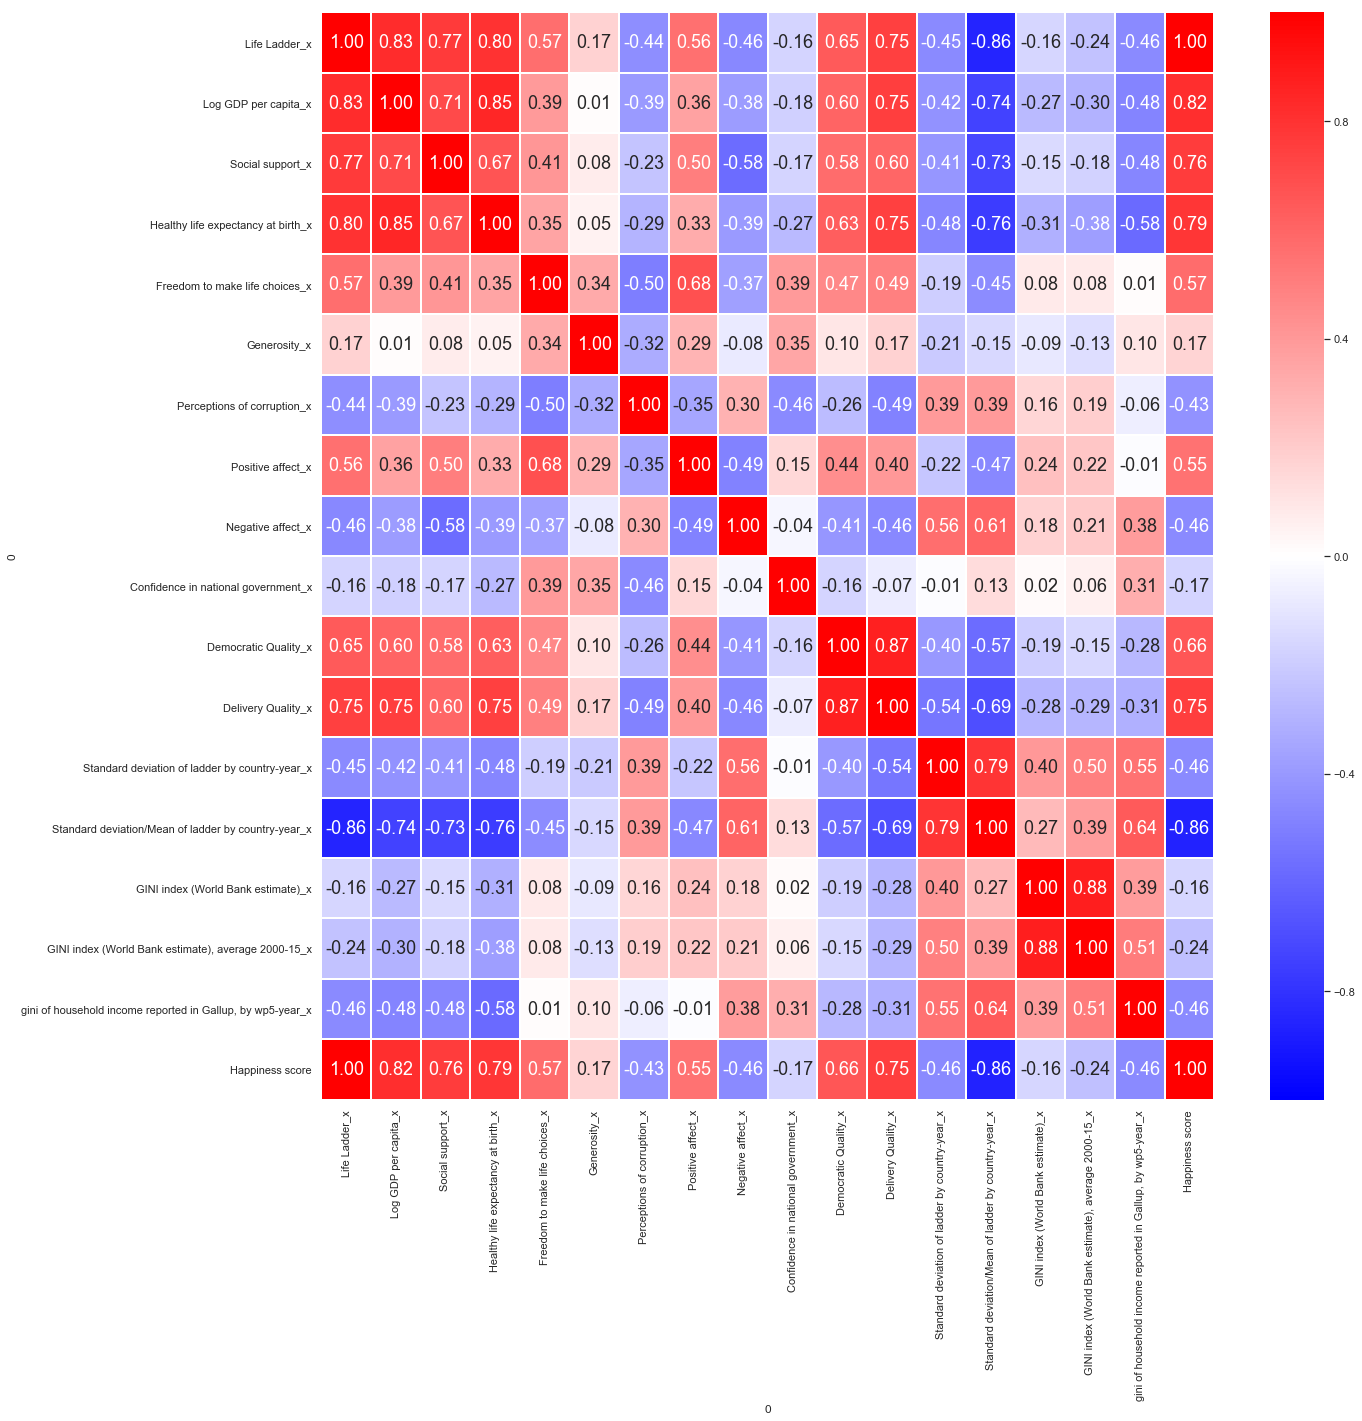

In [32]:
f,axes = plt.subplots(1,1,figsize = (20,20))
sb.heatmap(data_corr.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws={"size":18}, cmap = "bwr")

#### Top factors that are highly correlated to Happiness Score:
- Life Ladder: 1.00
- Log GDP Per Capita: 0.82
- Healthy Life Expectancy: 0.79
- Social Support: 0.76
- Delivery Quality: 0.75

## 2. Graph and plots across all variables
Summary of statistics 

In [33]:
data_plots = data_corr.copy()
data_plots = data_plots.drop(columns = "country")

C:\Users\chiac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



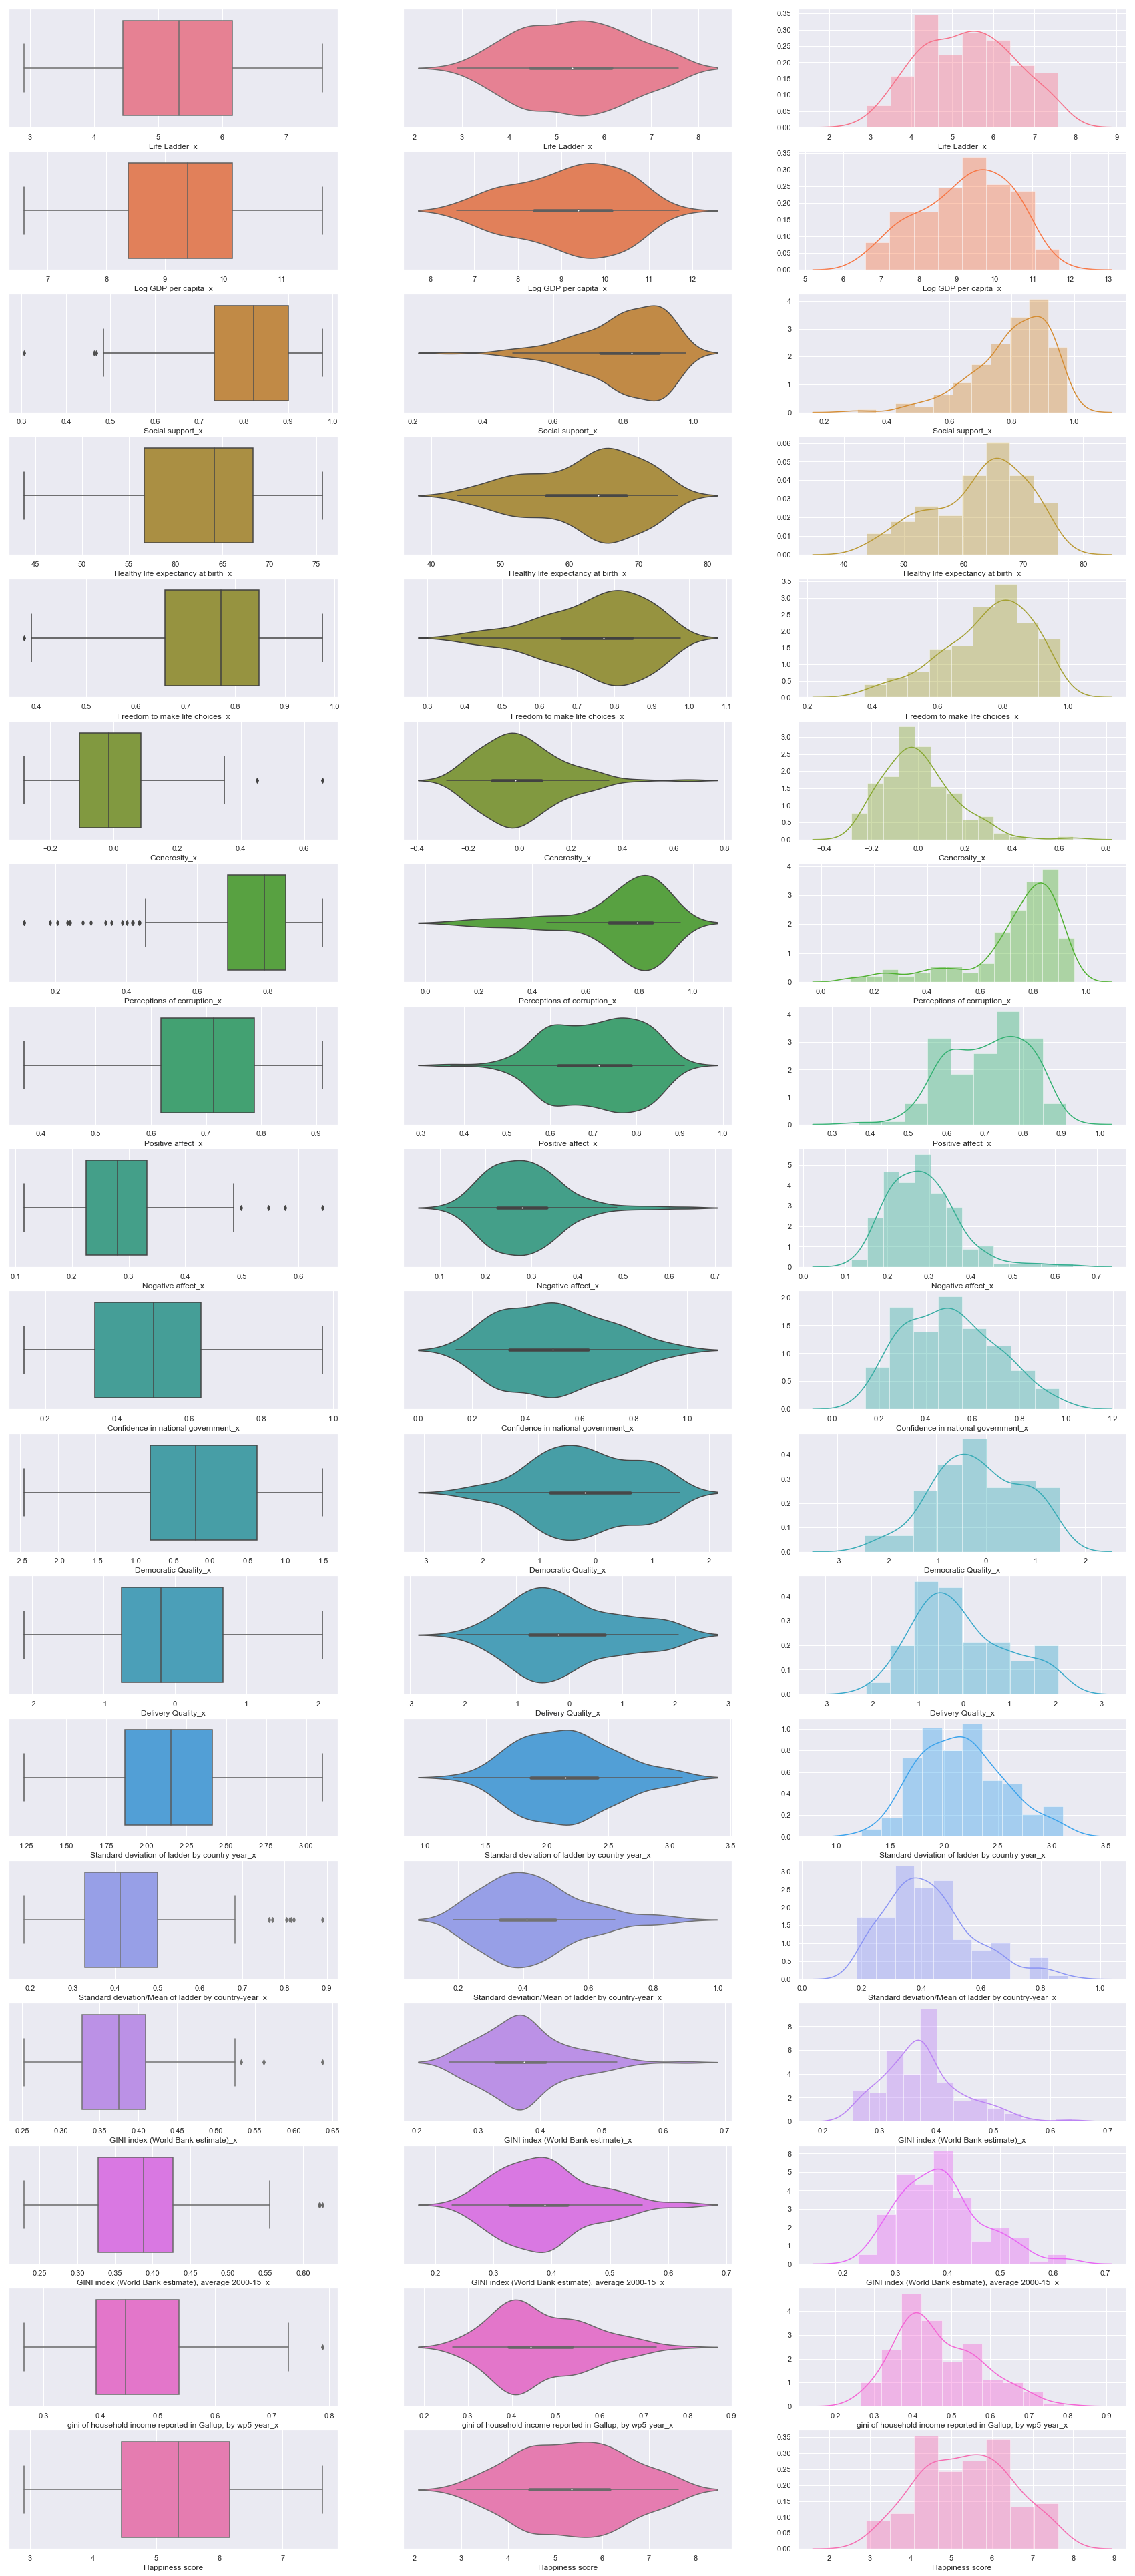

In [34]:
data_plots = data_plots.dropna()
f, axes = plt.subplots(18, 3, figsize = (30,70))
colors = sb.color_palette('husl', 18)
count = 0
for var in data_plots:
    sb.boxplot(data_plots[var], orient = "h", color = colors[count], ax = axes[count, 0])
    sb.violinplot(data_plots[var], orient = 'h', color = colors[count], ax = axes[count, 1])
    sb.distplot(data_plots[var], color = colors[count], ax = axes[count, 2])
    count += 1
plt.show()

## 3. Exploring Happiness Score using plotly

In [35]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [36]:
whrdata= data_corr.copy()

### We would like to take a look at the happiness score around the world
An interactive map using `Choropleth` is used to see the distribution of happiness in the world

In [37]:
trace1 = go.Choropleth(
            locations = whrdata['country'],
            locationmode='country names',
            z = whrdata['Happiness score'],
            text = whrdata['country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Happiness score',
                tickprefix = '')
        )

data = [trace1]
layout = go.Layout(
    title = 'Country Happiness score',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

#### Analysis of Happiness Score (by continents):

America and Australia have relatively high Happiness Score, followed by Asia.

Africa has a relatively low Happiness Score across the globe.


In [38]:
def draw_map(dataset, title, colorscale, reversescale=False):
    trace2 = go.Choropleth(
                locations = whrdata['country'],
                locationmode='country names',
                z = whrdata['Happiness score'],
                text = whrdata['country'],
                autocolorscale =False,
                reversescale = reversescale,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Happiness Score',
                    tickprefix = '')
            )

    data = [trace2]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'orthographic'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)
    
draw_map(whrdata, 'Country Happiness Score', "RdBu")

An interactive `ScatterPlot` is used to see correlation with variables

In [39]:
trace3 = go.Scatter(
    x = whrdata['Log GDP per capita_x'],
    y = whrdata['Happiness score'],
    name="Happiness Score per year",
    marker=dict(
        color="Blue",
    ),
    mode = "markers"
)
data = [trace3]
layout = dict(title = 'Happiness Score per GDP per capita',
          xaxis = dict(title = 'Log GDP per capita', showticklabels=True), 
          yaxis = dict(title = 'Happiness score'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig)

We can observe that there is a postive linear relationship between GDP and Happiness Score.

# K-Means Clustering 

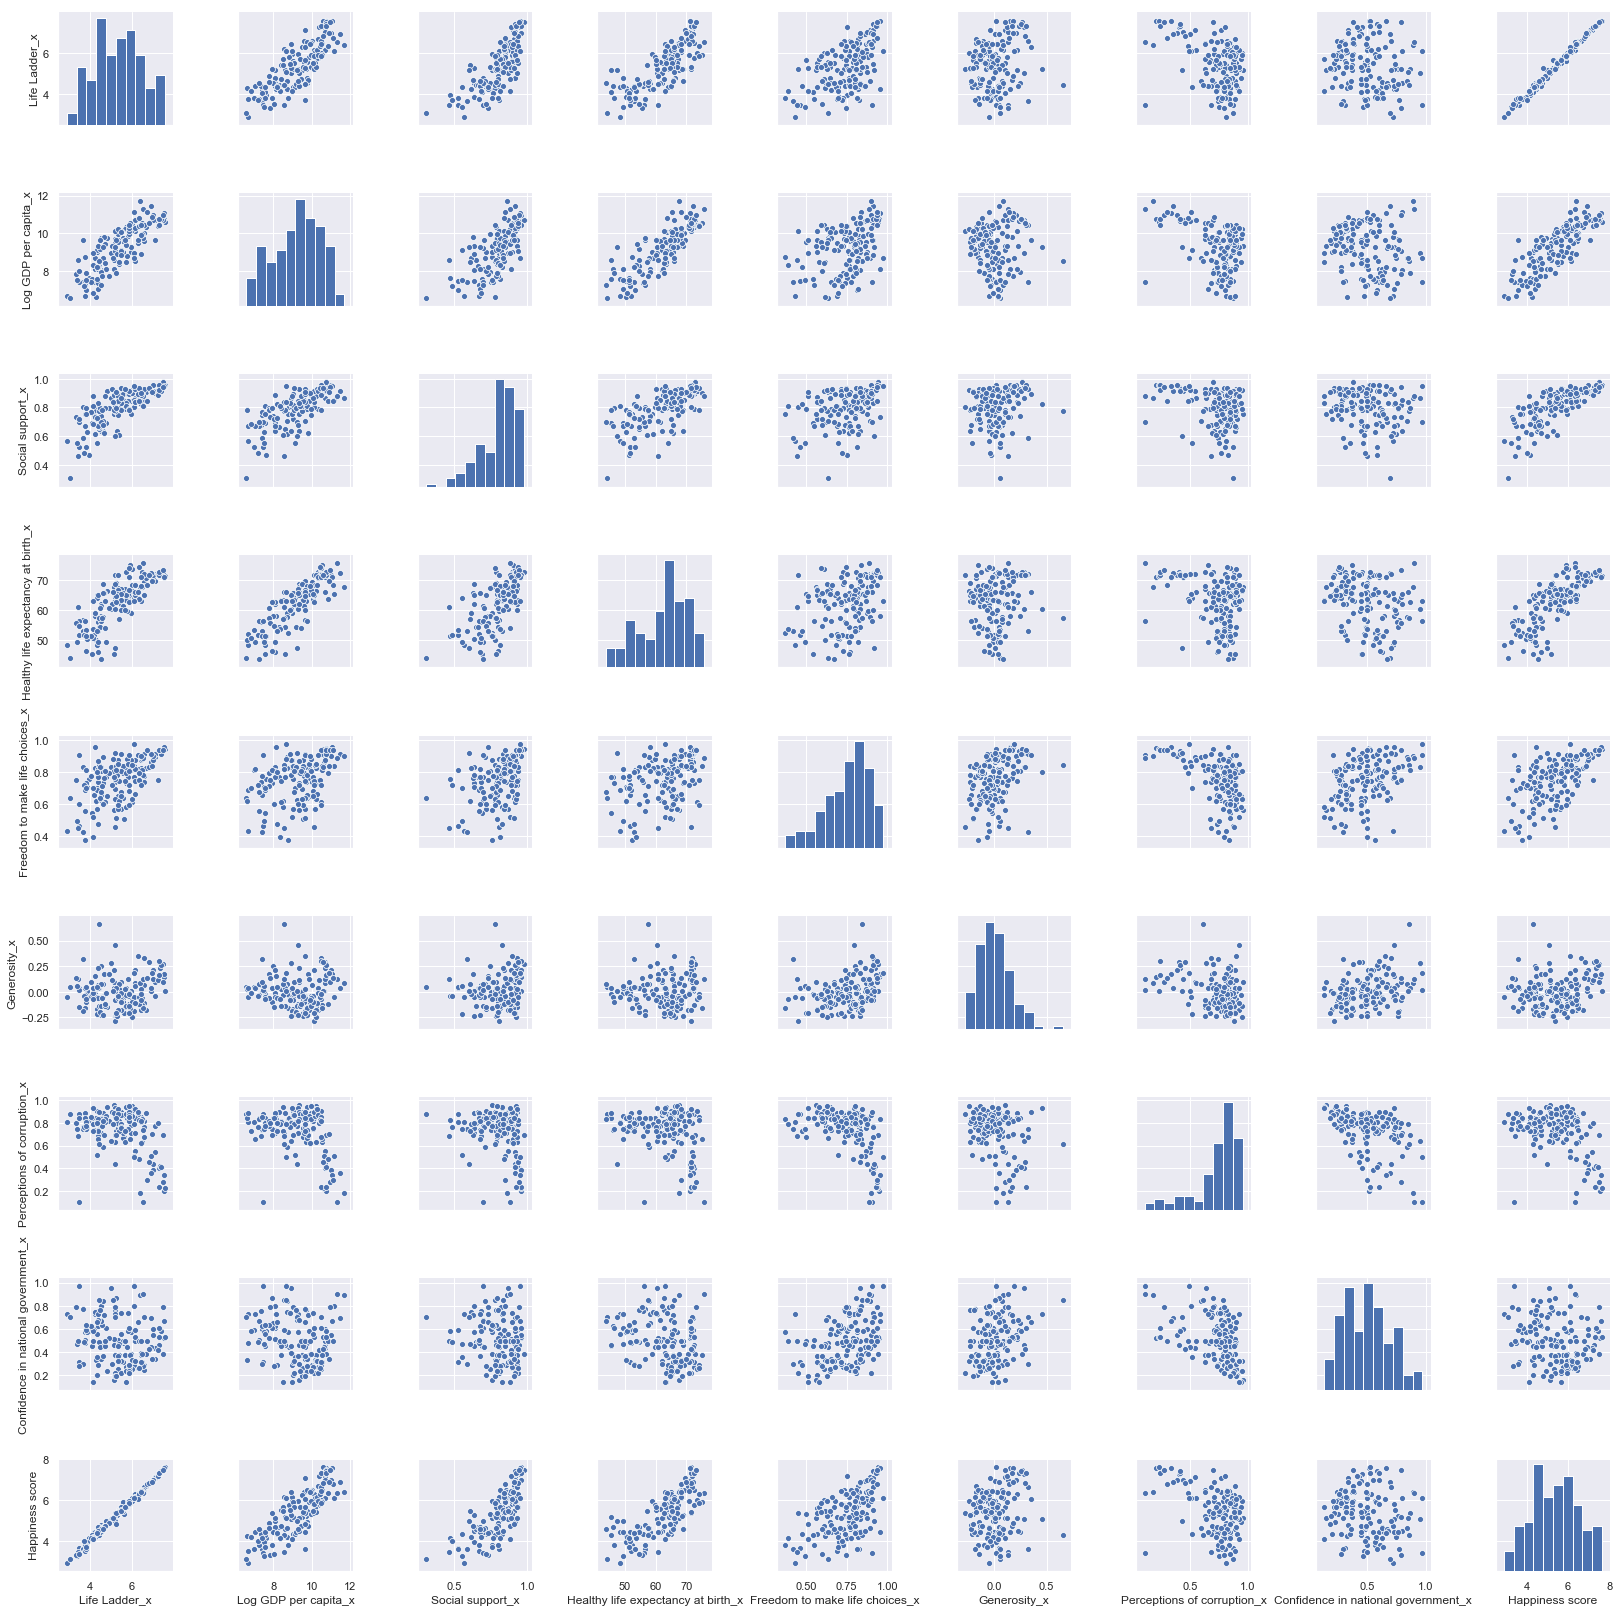

In [40]:
# Extract the Features from the Data
X = pd.DataFrame(cleandata[["Life Ladder_x", "Log GDP per capita_x", "Social support_x", "Healthy life expectancy at birth_x", "Freedom to make life choices_x", "Generosity_x", "Perceptions of corruption_x", "Confidence in national government_x", "Happiness score"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

**Variables that will help us predict Happiness Score:**     
- Life Ladder: Strong Linearity    
- Log GDP per capita:  Strong Linearity    
- Social Support : Relatively strong linear relation
- Healthy Life Expectancy at birth : Relatively strong linear relation

In [41]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

In [42]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()


In [43]:
# Setting "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
# Print the Cluster Centers
print("Features", "\tLL", "\tGDP", "\tSS", "\tBirth", "\tFTMLC", "\tG", "\tPOC", "\tConf", "\tHS")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

Features 	LL 	GDP 	SS 	Birth 	FTMLC 	G 	POC 	Conf 	HS

Cluster 0:	4.14	7.88	0.69	52.29	0.7	0.01	0.77	0.58	4.16	
Cluster 1:	6.57	10.47	0.89	71.15	0.83	0.04	0.61	0.45	6.58	
Cluster 2:	5.41	9.35	0.82	64.0	0.74	-0.03	0.78	0.48	5.4	

Within Cluster Sum of Squares : 1403.554694046234



C:\Users\chiac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



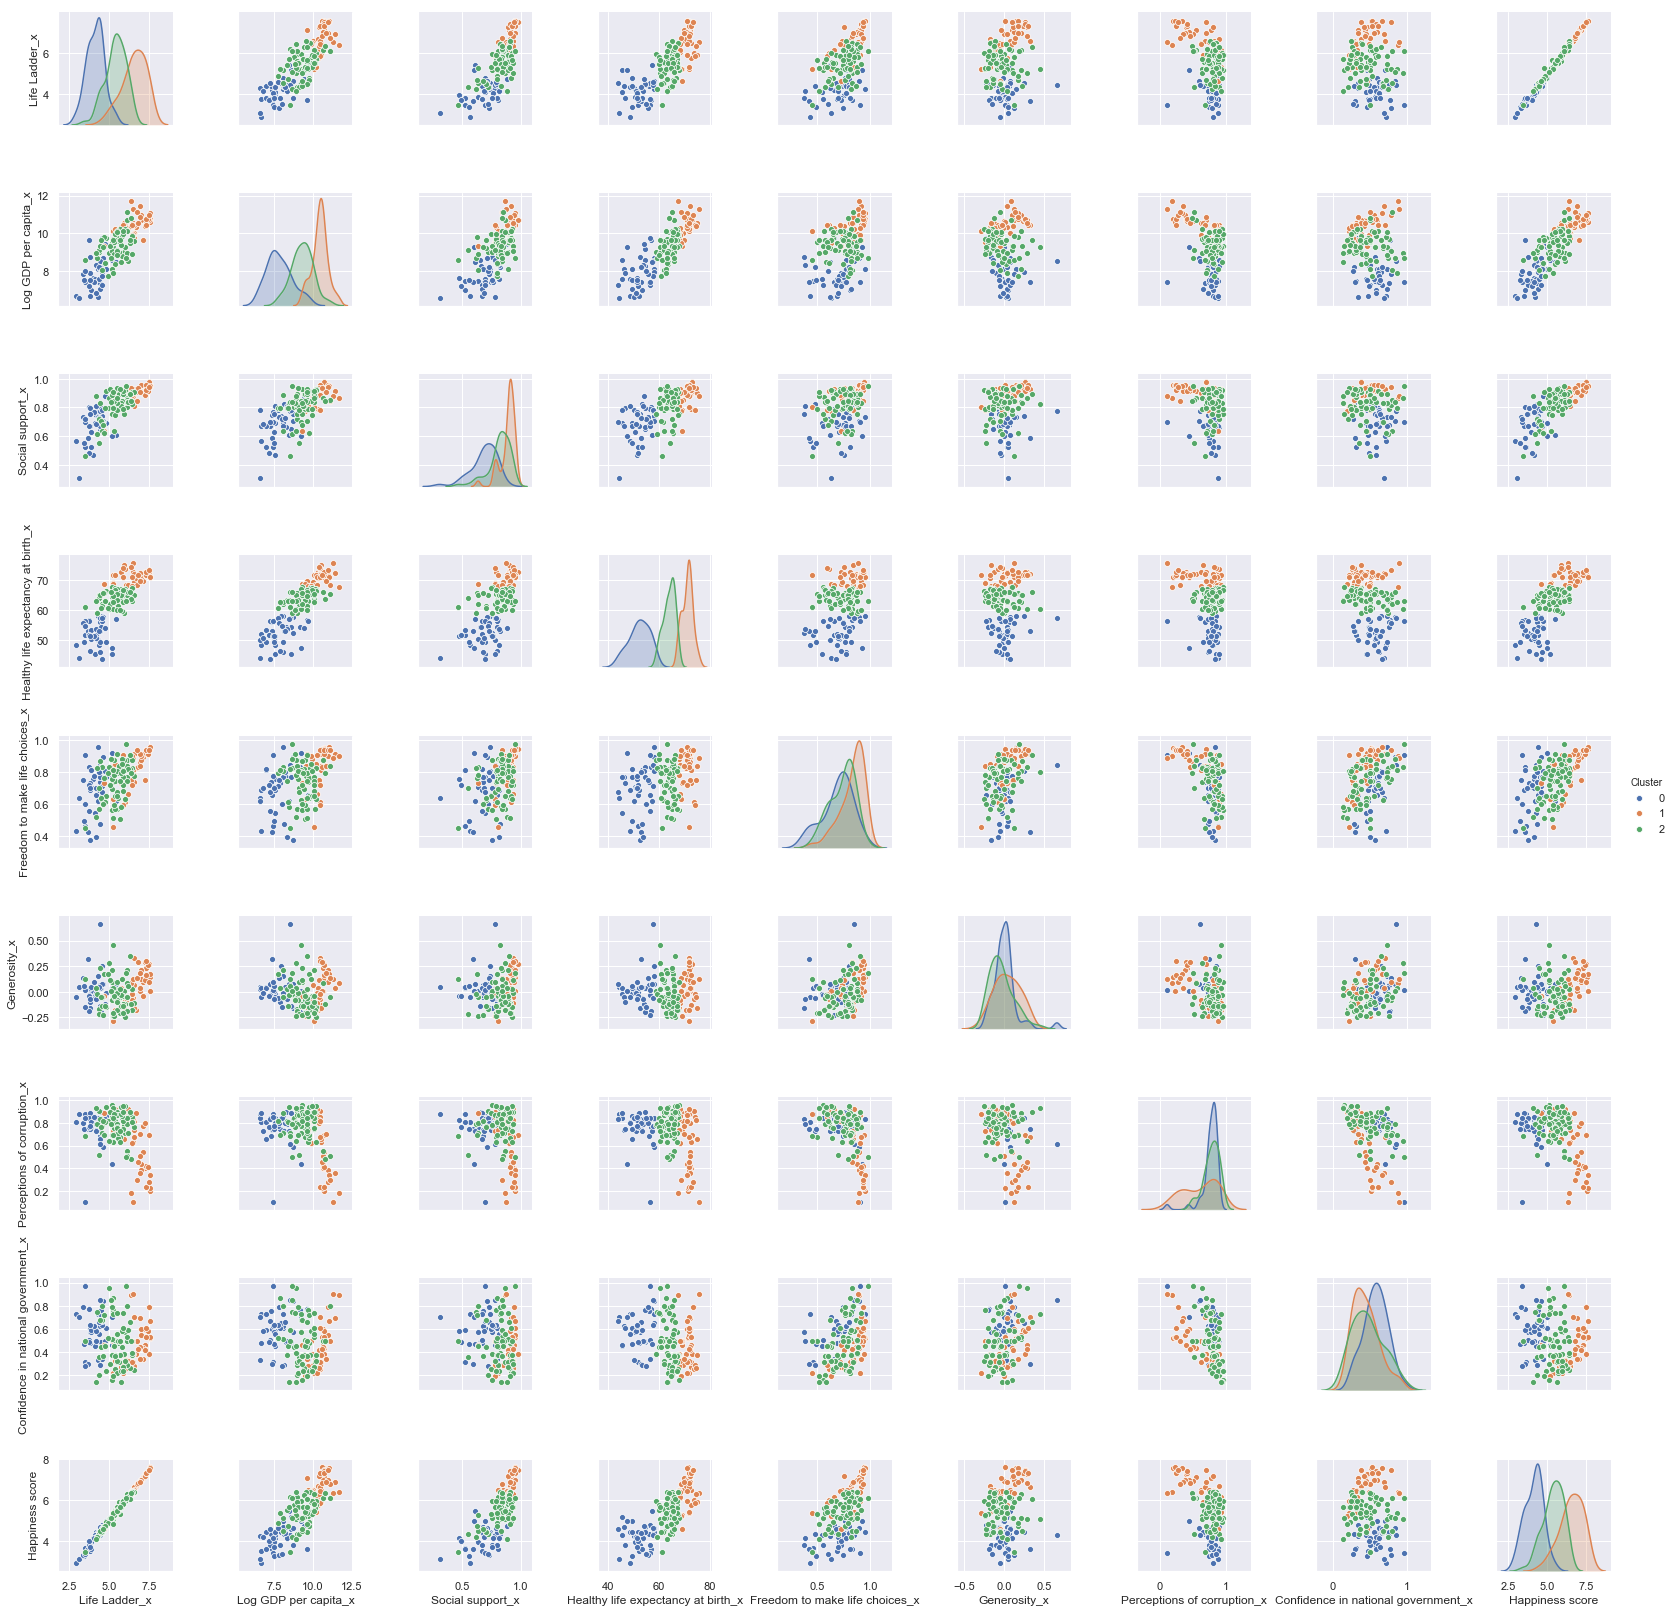

In [45]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

In [46]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(9, 1, figsize=(20,32))
sb.boxplot(x = 'Life Ladder_x', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Log GDP per capita_x', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Social support_x', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Healthy life expectancy at birth_x', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'Freedom to make life choices_x', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'Generosity_x', y = 'Cluster', data = X_labeled, ax = axes[5])
sb.boxplot(x = 'Perceptions of corruption_x', y = 'Cluster', data = X_labeled, ax = axes[6])
sb.boxplot(x = 'Confidence in national government_x', y = 'Cluster', data = X_labeled, ax = axes[7])
sb.boxplot(x = 'Happiness score', y = 'Cluster', data = X_labeled, ax = axes[8])

#### Conclusion drawn from clustering:
Taking the central model (Cluster 1) as an example, a high happiness score is usually accompanied by:
- High life ladder
- High GPD per capita
- High healthy life expectancy at birth
- High social support and high freedom. 

The opposite conclusion can be drawn from the top (Cluster 0) model. 

# Detecting Anomalies

In [47]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

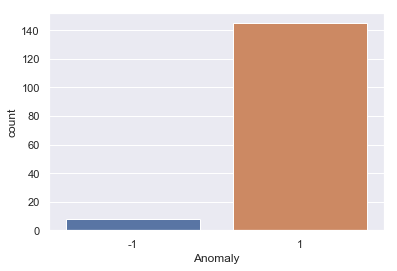

In [48]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

C:\Users\chiac\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



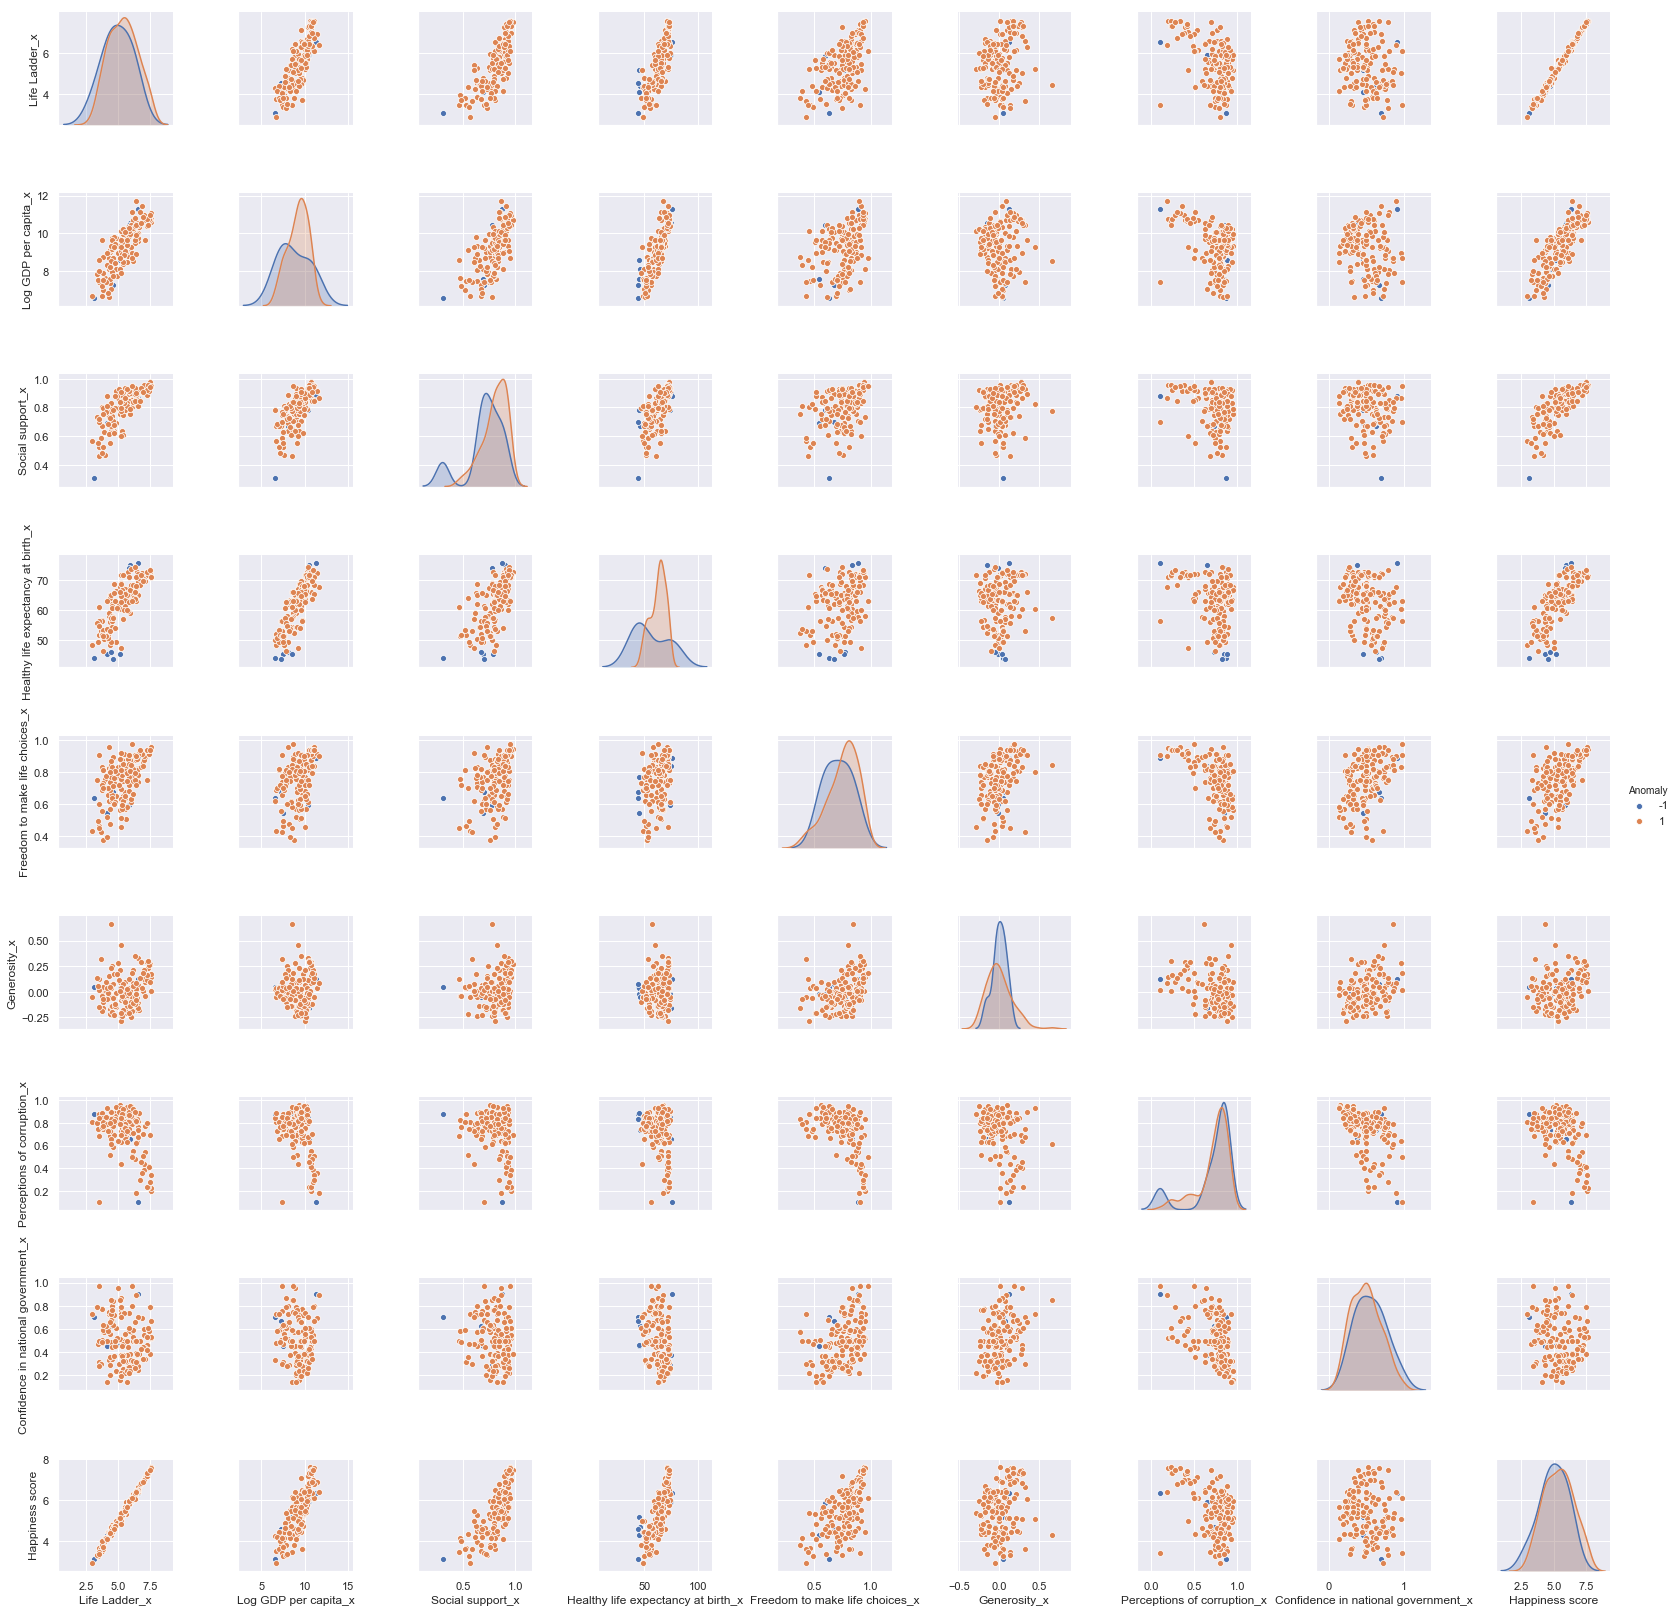

In [49]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

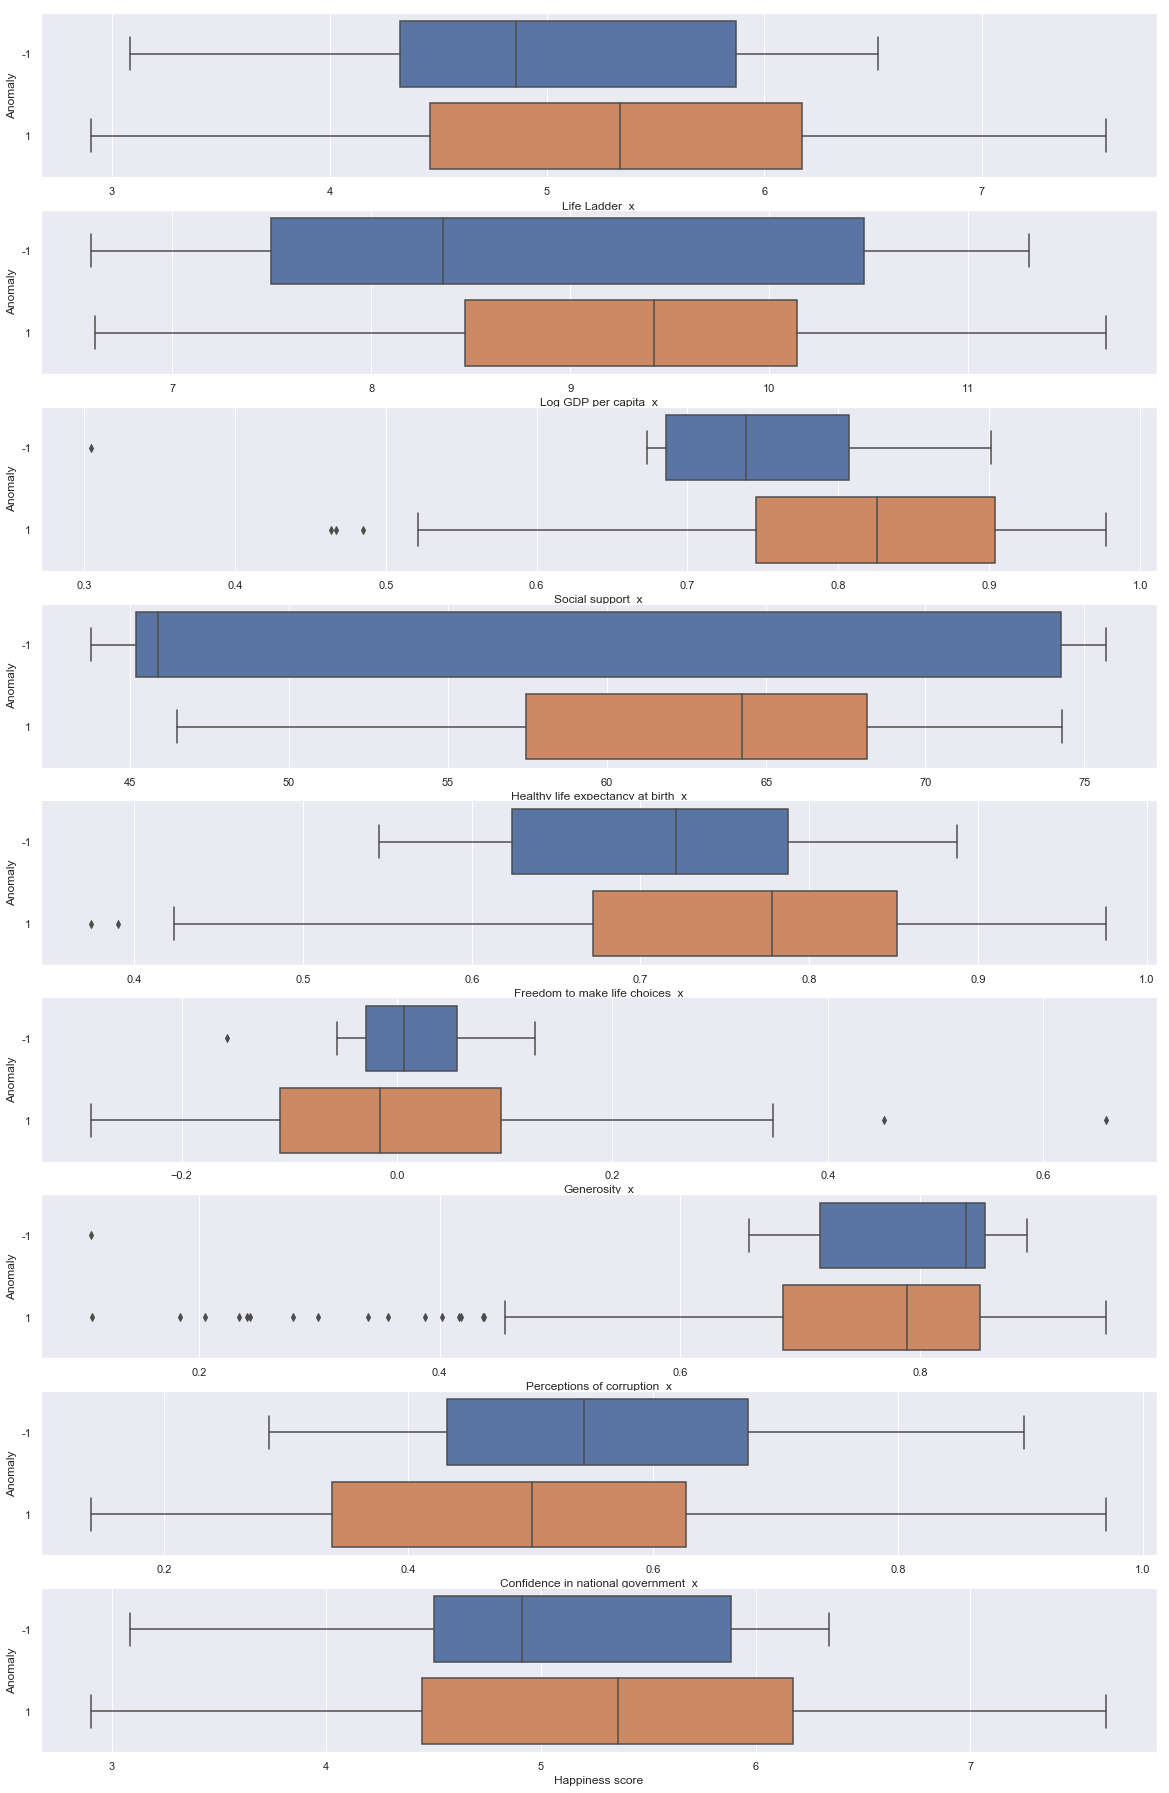

In [50]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(9, 1, figsize=(20,32))
sb.boxplot(x = 'Life Ladder_x', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Log GDP per capita_x', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Social support_x', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Healthy life expectancy at birth_x', y = 'Anomaly', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'Freedom to make life choices_x', y = 'Anomaly', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'Generosity_x', y = 'Anomaly', data = X_labeled, ax = axes[5])
sb.boxplot(x = 'Perceptions of corruption_x', y = 'Anomaly', data = X_labeled, ax = axes[6])
sb.boxplot(x = 'Confidence in national government_x', y = 'Anomaly', data = X_labeled, ax = axes[7])
sb.boxplot(x = 'Happiness score', y = 'Anomaly', data = X_labeled, ax = axes[8])

**Out of curiousity and interest, we wanted to find out more about the anomaly of Social Support.**

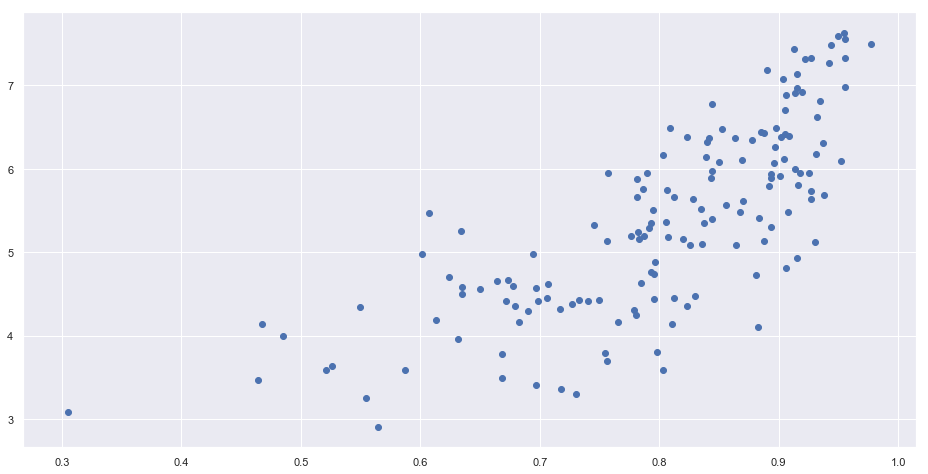

In [51]:
#Extracting only Social Support and Happiness 
socialvshappy = pd.DataFrame(cleandata[['Social support_x','Happiness score']]) 
f, axes = plt.subplots(1,1, figsize = (16,8)) 
plt.scatter( x = 'Social support_x', y = 'Happiness score', data = socialvshappy)

In [52]:
# Import LocalOutlierFactor from sklearn.neighbors 
from sklearn.neighbors import LocalOutlierFactor 

Text(0, 0.5, 'Happiness Score')

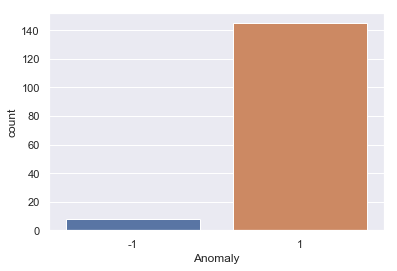

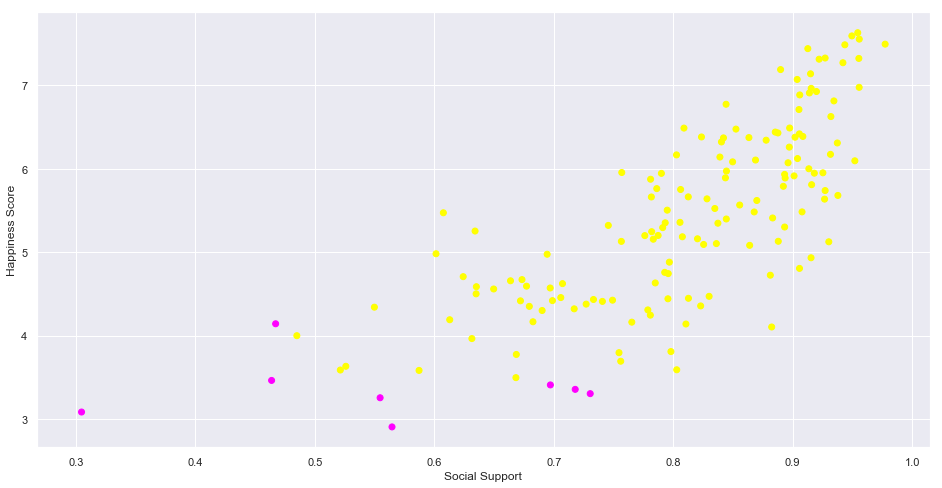

In [53]:
# Set the Parameters for Neighborhood 
num_neighbors = 20      # Number of Neighbors 
cont_fraction = 0.05    # Fraction of Anomalies 
 
# Create Anomaly Detection Model using LocalOutlierFactor 
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction) 
 
# Fit the Model on the Data and Predict Anomalies 
lof.fit(socialvshappy)
# Predict the Anomalies 
labels = lof.fit_predict(socialvshappy) 
 
# Append Labels to the Data 
X_labeled = socialvshappy.copy() 
X_labeled["Anomaly"] = pd.Categorical(labels) 
 
# Summary of the Anomaly Labels 
sb.countplot(X_labeled["Anomaly"])
f, axes = plt.subplots(1,1, figsize=(16,8)) 
plt.scatter(x= "Social support_x", y = "Happiness score", c= 'Anomaly', cmap = 'spring', data = X_labeled) 
plt.xlabel('Social Support') 
plt.ylabel('Happiness Score')

In [54]:
cleandata['Social Support vs Happiness Anomaly'] = X_labeled['Anomaly'] 
cleandata[cleandata['Social Support vs Happiness Anomaly'] == -1]

0                     country  Life Ladder_x  Log GDP per capita_x  \
14                      Benin       3.958156              7.608576   
22                    Burundi       2.904535              6.688570   
26   Central African Republic       3.084462              6.591758   
115                    Rwanda       3.470592              7.438650   
126               South Sudan       3.401875              7.519007   
132                     Syria       3.461913              8.573008   
135                  Tanzania       3.348433              7.839412   
150                     Yemen       3.507456              8.013866   

0    Social support_x  Healthy life expectancy at birth_x  \
14           0.467294                           51.455902   
22           0.564678                           48.568558   
26           0.304887                           44.313660   
115          0.697193                           56.371513   
126          0.554719                           49.357645   
132          0.463913                           60.954514   
135          0.730527                           55.661935   
150          0.717974                           54.704479   

0    Freedom to make life choices_x  Generosity_x  \
14                         0.753883     -0.038017   
22                         0.431385     -0.049049   
26                         0.634654      0.048724   
115                        0.904218      0.014150   
126                        0.493705      0.053832   
132                        0.448271      0.129377   
135                        0.747198      0.130106   
150                        0.600511     -0.151890   

0    Perceptions of corruption_x  Positive affect_x  Negative affect_x  \
14                      0.827469           0.601207           0.390117   
22                      0.807619           0.655664           0.251095   
26                      0.874320           0.596260           0.546802   
115                     0.110402           0.745446           0.208466   
126                     0.749433           0.600169           0.486184   
132                     0.685237           0.369440           0.642589   
135                     0.794290           0.689617           0.233625   
150                     0.845251           0.510637           0.280005   

0    Confidence in national government_x  Democratic Quality_x  \
14                              0.585268              0.206626   
22                              0.725120             -0.912846   
26                              0.699520             -1.454520   
115                             0.969764             -0.635415   
126                             0.468385             -2.053987   
132                             0.500960             -2.448228   
135                             0.785804             -0.302059   
150                             0.280899             -2.049012   

0    Delivery Quality_x  Standard deviation of ladder by country-year_x  \
14            -0.556391                                        2.231581   
22            -1.015209                                        2.216346   
26            -1.457469                                        2.528981   
115            0.241663                                        1.729889   
126           -1.826904                                        2.972336   
132           -1.548680                                        2.812082   
135           -0.501570                                        2.558909   
150           -1.358738                                        2.229127   

0    Standard deviation/Mean of ladder by country-year_x  \
14                                            0.558525     
22                                            0.763064     
26                                            0.821700     
115                                           0.500112     
126                                           0.889823     
132                                        

In [55]:
tzn = pd.DataFrame(cleandata[cleandata.country=='Tanzania'] )
tzn.head()

0     country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
135  Tanzania       3.348433              7.839412          0.730527   

0    Healthy life expectancy at birth_x  Freedom to make life choices_x  \
135                           55.661935                        0.747198   

0    Generosity_x  Perceptions of corruption_x  Positive affect_x  \
135      0.130106                      0.79429           0.689617   

0    Negative affect_x  Confidence in national government_x  \
135           0.233625                             0.785804   

0    Democratic Quality_x  Delivery Quality_x  \
135             -0.302059            -0.50157   

0    Standard deviation of ladder by country-year_x  \
135                                        2.558909   

0    Standard deviation/Mean of ladder by country-year_x  \
135                                           0.770861     

0    GINI index (World Bank estimate)_x  \
135                              0.3905   

0    GINI index (World Bank estimate), average 2000-15_x  \
135                                           0.384667     

0    gini of household income reported in Gallup, by wp5-year_x  \
135                                           0.590446            

0    Happiness score Social Support vs Happiness Anomaly  
135           3.3035                                  -1

#### What we observed:
We were curious about why a country with high social support, has a low Happiness Score. An example we saw was Tanzania. The social support score was the highest amoung all the anomalies, however, it still has a low Happiness Score. We would like to point out that in this special case for anomaly, even though the GDP, Social Support and Healthy life expactancy of Benin have lower values than Tanzania, Benin still had a higher Happiness Score of 4.1.

# Random Forest Algorithm
Helps us to look for the most important variable in relation to Happiness Score

In [56]:
copy.head()

0      country  year  Life Ladder  Log GDP per capita  Social support  \
1  Afghanistan  2008     3.723590            7.168690        0.450662   
2  Afghanistan  2009     4.401778            7.333790        0.552308   
3  Afghanistan  2010     4.758381            7.386629        0.539075   
4  Afghanistan  2011     3.831719            7.415019        0.521104   
5  Afghanistan  2012     3.782938            7.517126        0.520637   

0  Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         49.209663                      0.718114    0.181819   
2                         49.624432                      0.678896    0.203614   
3                         50.008961                      0.600127    0.137630   
4                         50.367298                      0.495901    0.175329   
5                         50.709263                      0.530935    0.247159   

0  Perceptions of corruption  Positive affect  Negative affect  \
1                   0.881686         0.517637         0.258195   
2                   0.850035         0.583926         0.237092   
3                   0.706766         0.618265         0.275324   
4                   0.731109         0.611387         0.267175   
5                   0.775620         0.710385         0.267919   

0  Confidence in national government  Democratic Quality  Delivery Quality  \
1                           0.612072           -1.929690         -1.655084   
2                           0.611545           -2.044093         -1.635025   
3                           0.299357           -1.991810         -1.617176   
4                           0.307386           -1.919018         -1.616221   
5                           0.435440           -1.842996         -1.404078   

0  Standard deviation of ladder by country-year  \
1                                      1.774662   
2                                      1.722688   
3                                      1.878622   
4                                      1.785360   
5                                      1.798283   

0  Standard deviation/Mean of ladder by country-year  \
1                                           0.476600   
2                                           0.391362   
3                                           0.394803   
4                                           0.465942   
5                                           0.475367   

0  GINI index (World Bank estimate)  \
1                               NaN   
2                               NaN   
3                               NaN   
4                               NaN   
5                               NaN   

0  GINI index (World Bank estimate), average 2000-15  \
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

0  gini of household income reported in Gallup, by wp5-year  
1                                                NaN         
2                                           0.441906         
3                                           0.327318         
4                                           0.336764         
5                                           0.344540

In [57]:
rf = copy.copy()
rf.shape

(1562, 19)

In [58]:
#Checking for null values
rf.isnull().sum()

0
country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by c

**For easier and better representation, we decided to drop the following:**

- GINI index (World Bank estimate)
- gini of household income reported in Gallup, by wp5-year
- year

The important variables will be used for analysis

In [59]:
rf= rf.drop(columns =['GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year','year'])

In [60]:
#Empty data will be filled with the average of each variable.
rf = rf.fillna(rf.mean())

In [61]:
#Checking for any more null values
rf.isnull().sum()

0
country                                              0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
GINI index (World Bank estimate), average 2000-15    0
dtype: int64

In [62]:
#LabelEncoder for each country for preprocessing
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
rf['country_code'] = lb_make.fit_transform(rf['country'])

In [63]:
rf.head()

0      country  Life Ladder  Log GDP per capita  Social support  \
1  Afghanistan     3.723590            7.168690        0.450662   
2  Afghanistan     4.401778            7.333790        0.552308   
3  Afghanistan     4.758381            7.386629        0.539075   
4  Afghanistan     3.831719            7.415019        0.521104   
5  Afghanistan     3.782938            7.517126        0.520637   

0  Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         49.209663                      0.718114    0.181819   
2                         49.624432                      0.678896    0.203614   
3                         50.008961                      0.600127    0.137630   
4                         50.367298                      0.495901    0.175329   
5                         50.709263                      0.530935    0.247159   

0  Perceptions of corruption  Positive affect  Negative affect  \
1                   0.881686         0.517637         0.258195   
2                   0.850035         0.583926         0.237092   
3                   0.706766         0.618265         0.275324   
4                   0.731109         0.611387         0.267175   
5                   0.775620         0.710385         0.267919   

0  Confidence in national government  Democratic Quality  Delivery Quality  \
1                           0.612072           -1.929690         -1.655084   
2                           0.611545           -2.044093         -1.635025   
3                           0.299357           -1.991810         -1.617176   
4                           0.307386           -1.919018         -1.616221   
5                           0.435440           -1.842996         -1.404078   

0  Standard deviation of ladder by country-year  \
1                                      1.774662   
2                                      1.722688   
3                                      1.878622   
4                                      1.785360   
5                                      1.798283   

0  Standard deviation/Mean of ladder by country-year  \
1                                           0.476600   
2                                           0.391362   
3                                           0.394803   
4                                           0.465942   
5                                           0.475367   

0  GINI index (World Bank estimate), average 2000-15  country_code  
1                                           0.386948             0  
2                                           0.386948             0  
3                                           0.386948             0  
4                                           0.386948             0  
5                                           0.386948             0

In [64]:
#Import train_test_split function
from sklearn.model_selection import train_test_split
x = rf[['Life Ladder', 'Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate), average 2000-15']]
y = rf['country_code'] #labels

#Split dataset into training set and test set
#Split 70% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [65]:
#Import random forest model
from sklearn.ensemble import RandomForestClassifier

#Create a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using training set
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [67]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9424307036247335


In [68]:
rf = rf.drop(columns = 'country')

In [69]:
rf.head()

0  Life Ladder  Log GDP per capita  Social support  \
1     3.723590            7.168690        0.450662   
2     4.401778            7.333790        0.552308   
3     4.758381            7.386629        0.539075   
4     3.831719            7.415019        0.521104   
5     3.782938            7.517126        0.520637   

0  Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         49.209663                      0.718114    0.181819   
2                         49.624432                      0.678896    0.203614   
3                         50.008961                      0.600127    0.137630   
4                         50.367298                      0.495901    0.175329   
5                         50.709263                      0.530935    0.247159   

0  Perceptions of corruption  Positive affect  Negative affect  \
1                   0.881686         0.517637         0.258195   
2                   0.850035         0.583926         0.237092   
3                   0.706766         0.618265         0.275324   
4                   0.731109         0.611387         0.267175   
5                   0.775620         0.710385         0.267919   

0  Confidence in national government  Democratic Quality  Delivery Quality  \
1                           0.612072           -1.929690         -1.655084   
2                           0.611545           -2.044093         -1.635025   
3                           0.299357           -1.991810         -1.617176   
4                           0.307386           -1.919018         -1.616221   
5                           0.435440           -1.842996         -1.404078   

0  Standard deviation of ladder by country-year  \
1                                      1.774662   
2                                      1.722688   
3                                      1.878622   
4                                      1.785360   
5                                      1.798283   

0  Standard deviation/Mean of ladder by country-year  \
1                                           0.476600   
2                                           0.391362   
3                                           0.394803   
4                                           0.465942   
5                                           0.475367   

0  GINI index (World Bank estimate), average 2000-15  country_code  
1                                           0.386948             0  
2                                           0.386948             0  
3                                           0.386948             0  
4                                           0.386948             0  
5                                           0.386948             0

In [70]:
rf_list = []
for i in rf:
    if i != 'country_code':
        rf_list.append(i)
        
print(len(rf_list))

15


In [71]:
impt = pd.Series(clf.feature_importances_, index = rf_list).sort_values(ascending = False)
impt

GINI index (World Bank estimate), average 2000-15    0.160692
Log GDP per capita                                   0.104645
Healthy life expectancy at birth                     0.088669
Delivery Quality                                     0.080616
Democratic Quality                                   0.073721
Generosity                                           0.063529
Perceptions of corruption                            0.058045
Social support                                       0.051768
Negative affect                                      0.050782
Positive affect                                      0.047920
Life Ladder                                          0.047885
Freedom to make life choices                         0.046394
Confidence in national government                    0.044594
Standard deviation/Mean of ladder by country-year    0.042374
Standard deviation of ladder by country-year         0.038367
dtype: float64

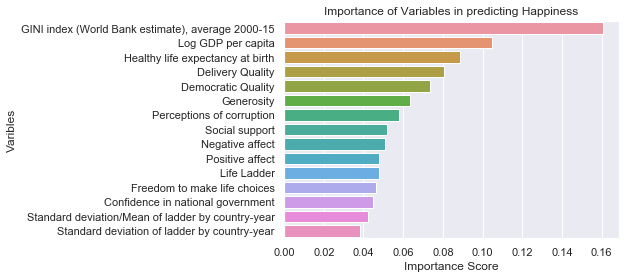

In [72]:
#Creating a bar plot
sb.barplot(x=impt, y=impt.index)

#Labels
plt.xlabel("Importance Score")
plt.ylabel('Varibles')
plt.title('Importance of Variables in predicting Happiness')
plt.show()

#### Most important variables from Random Forest:
- GINI Index
- Log GDP per capita
- Health life expectancy at birth 
- Delivery Quality
- Democractic Quality

#### Something interesing...
Based on the analysis from correlation matrix, there is a low correlation of -0.24 between GINI Index (average) and Happiness Score. However, based on the random forest tree algorithm, it is the most important variable in predicting Happiness.

#### What can be learned:
What we can learn from this is that different visualizations models have different strengths and have different ways of analysing a dataset. However, though the results are different in terms of the ranking of the variables, the general trend that GINI Index having an effect on predicting happiness are shown by both models.

## Summary:

#### Top factors that are highly correlated to Happiness Score:
- Life Ladder: 1.00
- Log GDP Per Capita: 0.82
- Healthy Life Expectancy: 0.79
- Social Support: 0.76
- Delievery Quality: 0.75

#### Conclusion drawn from clustering:
Taking the central model (Cluster 1) as an example, a high happiness score is usually accompanied by
- High life ladder
- High GPD per capita
- High healthy life expectancy at birth
- High social support 
- High freedom. 

The opposite conclusion can be drawn from the top (Cluster 0) model. 

#### Most important variables from Random Forest:
- GINI Index
- Log GDP per capita
- Health life expectancy at birth 
- Delivery Quality
- Democractic Quality

We decided to pick 4 variables that contribute most to Happiness Score. Based on our analysis, **Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth** have the most impact on Happiness Score.


# Multi-Variate Linear Regression
Based on our analysis above, we have taken into consideration the following 4 variables that are important for a country to be Happy to run a multi- variate linear regression

Variables: Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth

Intercept of Regression 	: b =  [0.08925139]
Coefficients of Regression 	: a =  [[ 0.99738766  0.00179196  0.07992861 -0.00239595]]

                           Predictors  Coefficients
0                       Life Ladder_x      0.997388
1                Log GDP per capita_x      0.001792
2                    Social support_x      0.079929
3  Healthy life expectancy at birth_x     -0.002396



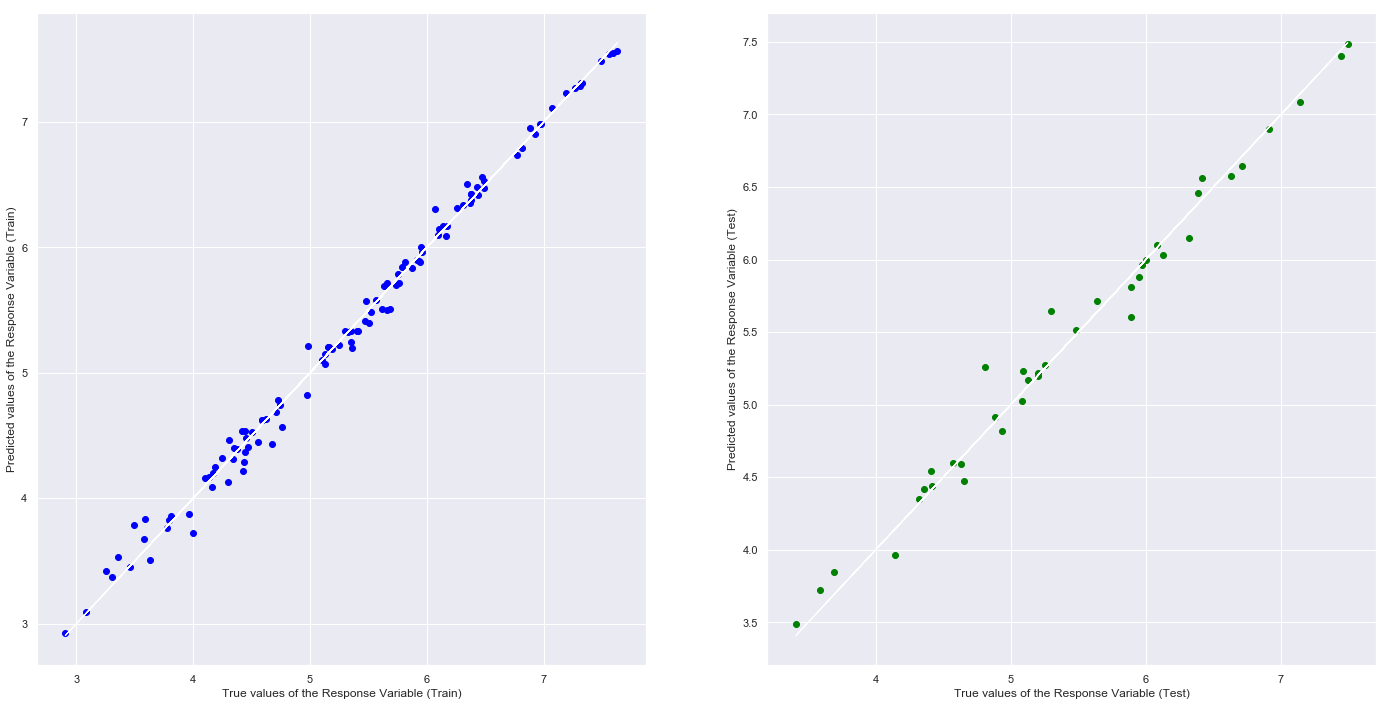

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9934713675739192
Mean Squared Error (MSE) 	: 0.00869130938447696

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9835116176968887
Mean Squared Error (MSE) 	: 0.01752539196167932



In [73]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(cleandata["Happiness score"]) # Response
X = pd.DataFrame(cleandata[['Life Ladder_x','Log GDP per capita_x','Social support_x','Healthy life expectancy at birth_x']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

#### Conclusion based on the linear regression:
The model has a high value of the explained Variance of 0.992 (Training Dataset) & 0.987 (Test Dataset) and a low Mean Squared Error of 0.010 (Training Dataset) & 0.014 (Test Dataset) which means that the variables gives a good prediction of Happiness Score.

# Prediction of Happiness Score
We would like to predict the value of Happiness score for a few specific Country -- Singapore, Malaysia and United States -- using the Regression Model derived above.

In [74]:
# Extract Happiness Score for Prediction
cleandata_pred = cleandata[cleandata["country"].isin(["Singapore", "Malaysia", "United States"])]
cleandata_pred

0          country  Life Ladder_x  Log GDP per capita_x  Social support_x  \
84        Malaysia       6.142521             10.110291          0.840342   
120      Singapore       6.523452             11.304794          0.877737   
145  United States       6.952605             10.879187          0.905856   

0    Healthy life expectancy at birth_x  Freedom to make life choices_x  \
84                            64.983311                        0.741489   
120                           75.675051                        0.887911   
145                           69.770920                        0.835305   

0    Generosity_x  Perceptions of corruption_x  Positive affect_x  \
84       0.212008                     0.841354           0.772125   
120      0.128124                     0.110162           0.817061   
145      0.179972                     0.704980           0.820108   

0    Negative affect_x  Confidence in national government_x  \
84            0.287313                             0.534103   
120           0.153021                             0.902511   
145           0.272106                             0.344837   

0    Democratic Quality_x  Delivery Quality_x  \
84              -0.056547            0.673893   
120              0.567555            2.064073   
145              0.817886            1.458826   

0    Standard deviation of ladder by country-year_x  \
84                                         2.116058   
120                                        1.439499   
145                                        1.969304   

0    Standard deviation/Mean of ladder by country-year_x  \
84                                            0.345237     
120                                           0.220880     
145                                           0.283262     

0    GINI index (World Bank estimate)_x  \
84                             0.461500   
120                            0.374506   
145                            0.408333   

0    GINI index (World Bank estimate), average 2000-15_x  \
84                                            0.461000     
120                                           0.387755     
145                                           0.406800     

0    gini of household income reported in Gallup, by wp5-year_x  \
84                                            0.446691            
120                                           0.472976            
145                                           0.676827            

0    Happiness score Social Support vs Happiness Anomaly  
84            6.3221                                   1  
120           6.3432                                   1  
145           6.8860                                   1

In [75]:
# Extract Predictors for Prediction
predictors = ['Life Ladder_x','Log GDP per capita_x','Social support_x','Healthy life expectancy at birth_x']
X_pred = pd.DataFrame(cleandata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[6.14531418],
       [6.50476229],
       [6.9484251 ]])

In [76]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["Prediction Happiness score"], index = cleandata_pred.index)
cleandata_acc = pd.concat([cleandata_pred[["country", "Happiness score"]], y_pred], axis = 1)

y_errs = 100 * abs(cleandata_acc["Happiness score"] - cleandata_acc["Prediction Happiness score"]) / cleandata_acc["Happiness score"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = cleandata_pred.index)
cleandata_acc = pd.concat([cleandata_acc, y_errs], axis = 1)

cleandata_acc

country  Happiness score  Prediction Happiness score     Error
84        Malaysia           6.3221                    6.145314  2.796317
120      Singapore           6.3432                    6.504762  2.547012
145  United States           6.8860                    6.948425  0.906549

# Prediction Interval
The confidence on the prediction

In [77]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 0.01
Pred Standard Error (SE) 	: 0.09


In [78]:
y_95l = pd.DataFrame(cleandata_acc["Prediction Happiness score"] - 1.96*StdE_pred).rename(columns = {"Prediction Happiness score" : "95 Lower"})
y_95u = pd.DataFrame(cleandata_acc["Prediction Happiness score"] + 1.96*StdE_pred).rename(columns = {"Prediction Happiness score" : "95 Upper"})
y_99l = pd.DataFrame(cleandata_acc["Prediction Happiness score"] - 2.58*StdE_pred).rename(columns = {"Prediction Happiness score" : "99 Lower"})
y_99u = pd.DataFrame(cleandata_acc["Prediction Happiness score"] + 2.58*StdE_pred).rename(columns = {"Prediction Happiness score" : "99 Upper"})

cleandata_int = pd.concat([cleandata_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
cleandata_int

country  Happiness score  Prediction Happiness score     Error  \
84        Malaysia           6.3221                    6.145314  2.796317   
120      Singapore           6.3432                    6.504762  2.547012   
145  United States           6.8860                    6.948425  0.906549   

     95 Lower  95 Upper  99 Lower  99 Upper  
84   5.960965  6.329664  5.902650  6.387978  
120  6.320413  6.689112  6.262098  6.747427  
145  6.764076  7.132775  6.705761  7.191089

#### Comments on Prediction Model:
The error from our prediction interval is low (1-3%). This means that our regression model is a good indicator to predict subsequent years of Happiness Score. We have compared the 2018 Happiness Score to our predicted score, and they fall between our 99 Lower and 99 Upper bound, which strengthens our credibility of the prediction of Happiness Score. 

> For reference, the description of Happiness Score can be found here: https://en.wikipedia.org/wiki/World_Happiness_Report#:~:targetText=The%20World%20Happiness%20Report%202018,migration%20within%20and%20between%20countries. 
> **2018 Happiness Score:**  
> ***Happiness Score of Malaysia***: 6.322  
> ***Happiness Score of Singapore***: 6.343  
> ***Happiness Score of United States***: 6.886
